# GUC Clustering Project 

## Yazeed Ahmed Kamal // 49-11916

In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from itertools import combinations

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
def display_cluster(X, km=[], num_clusters=0, feature1='Feature 1', feature2='Feature 2'):
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray']
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=colors[0], alpha=alpha, s=s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1], c=colors[i % len(colors)], alpha=alpha, s=s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c=colors[i % len(colors)], marker='x', s=100)
    plt.title(f'Clustering with k={num_clusters}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

## 1- Multi Blob Data Set 

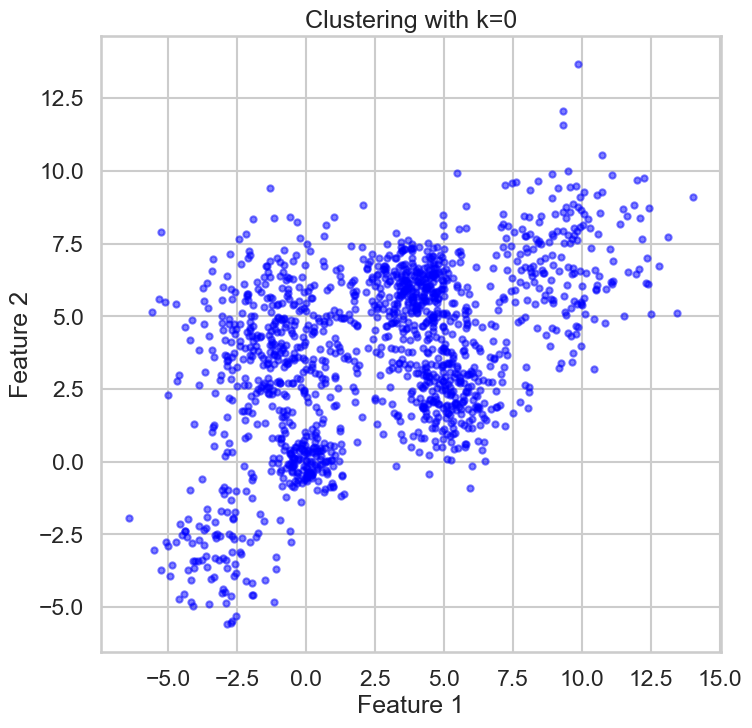

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

## Kmeans Multiblob data 

In [5]:
df = pd.DataFrame(data=Multi_blob_Data, columns=['Feature1', 'Feature2'])

I have choosen values from 2 - 20 because it will not take time as the iris and the customer datasets because it has only 2 features

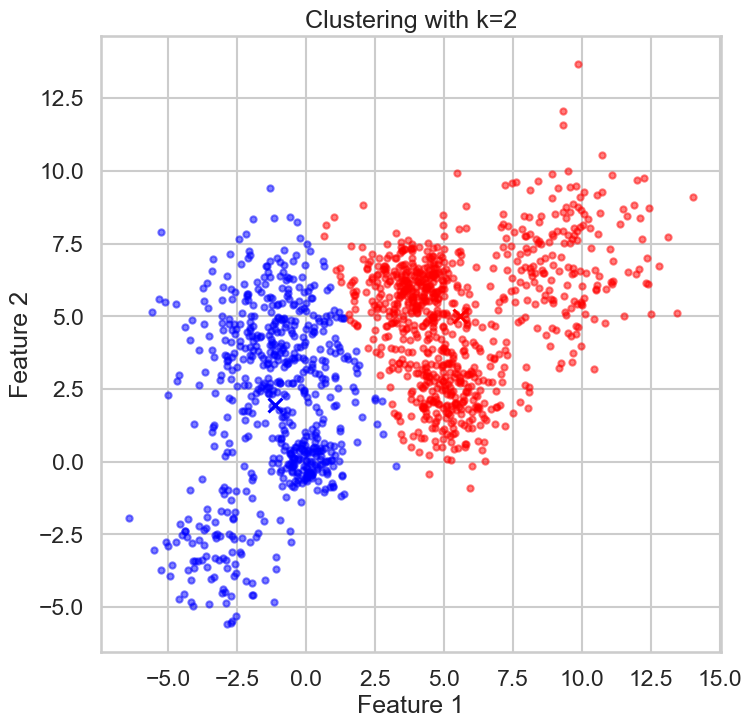

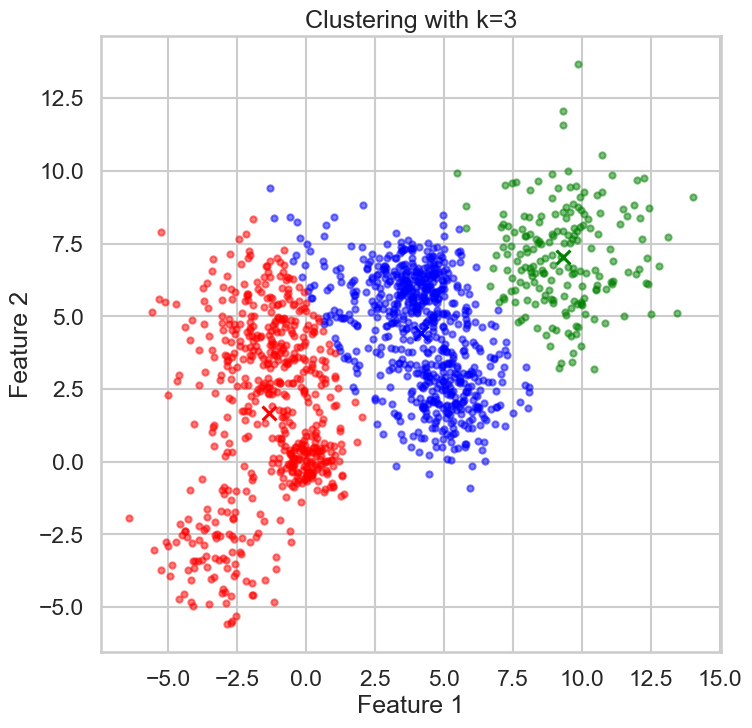

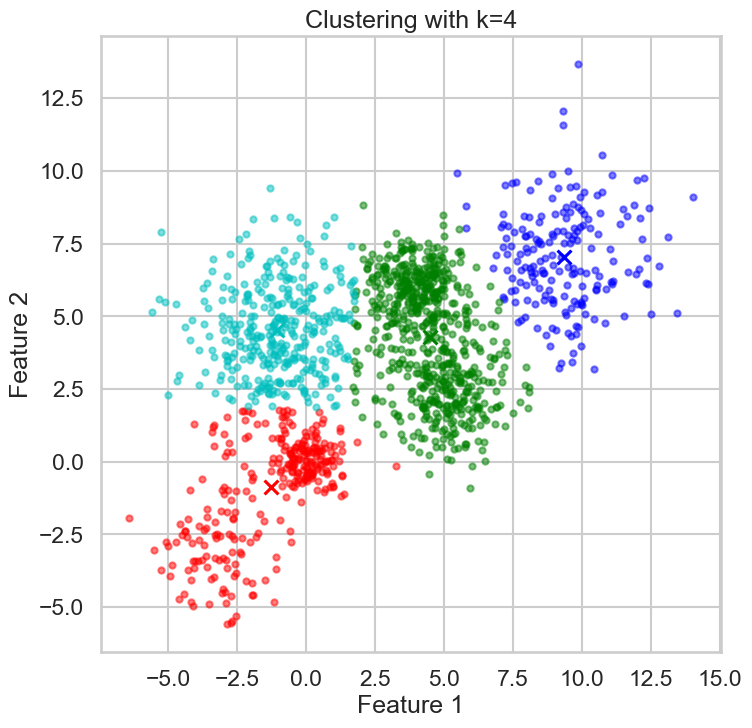

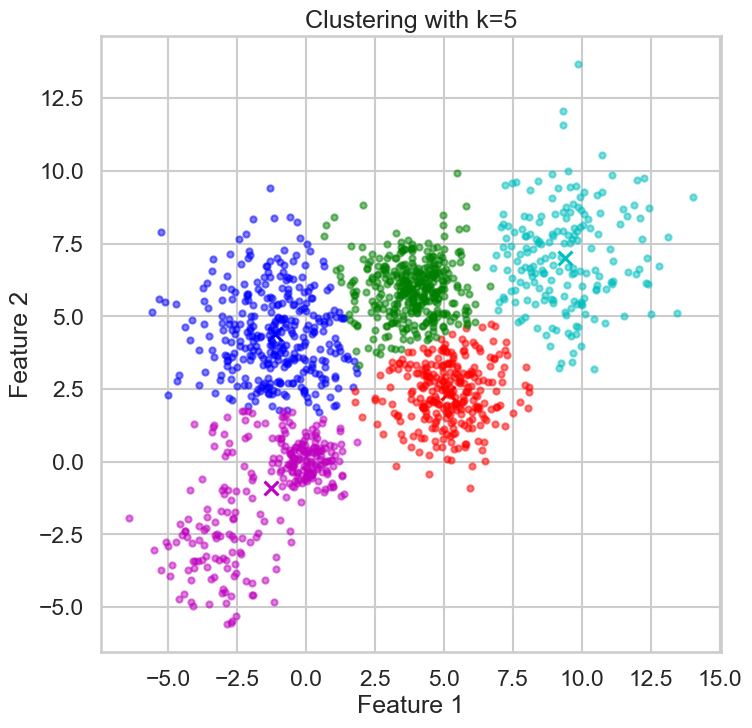

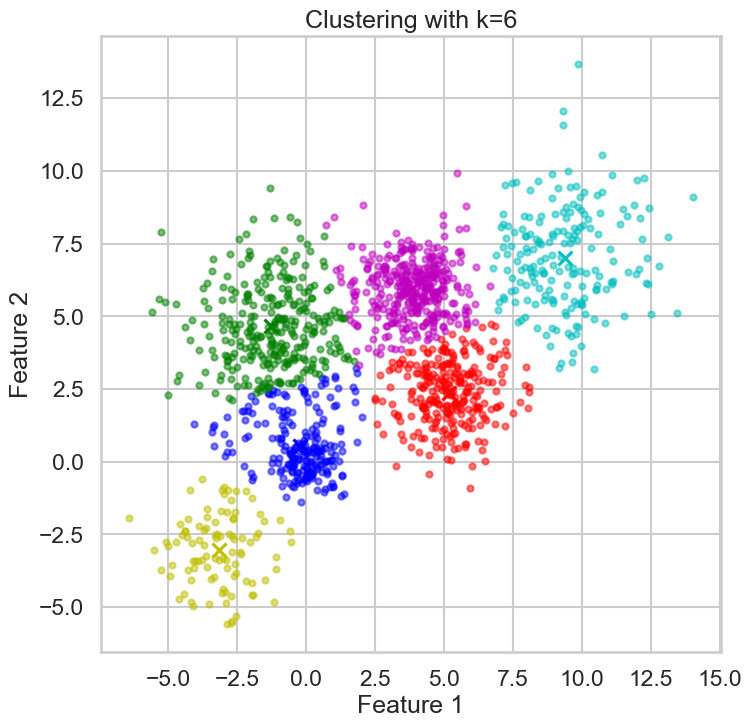

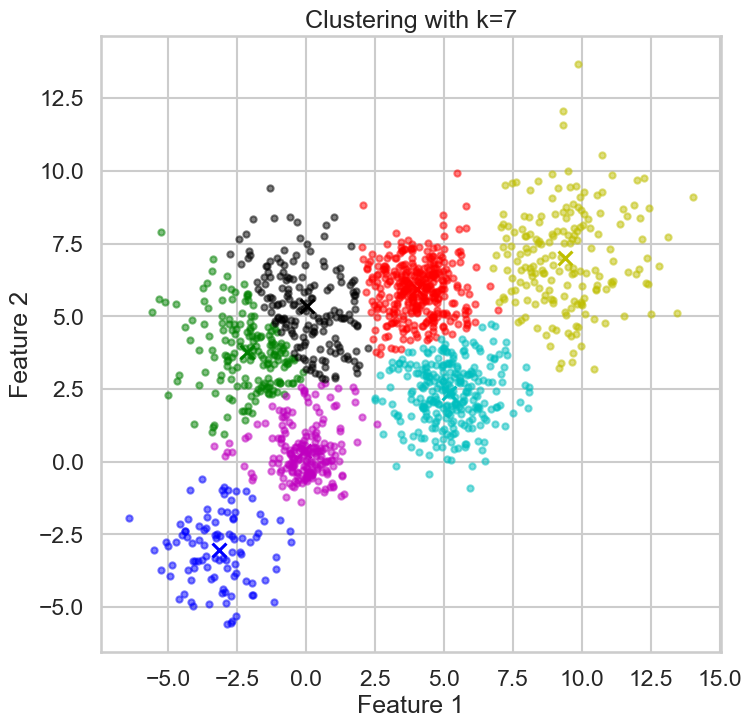

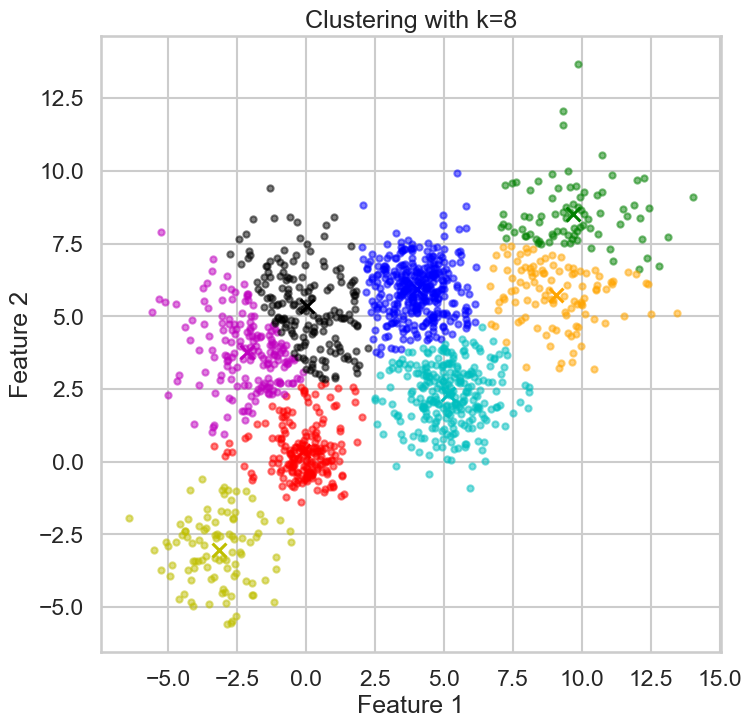

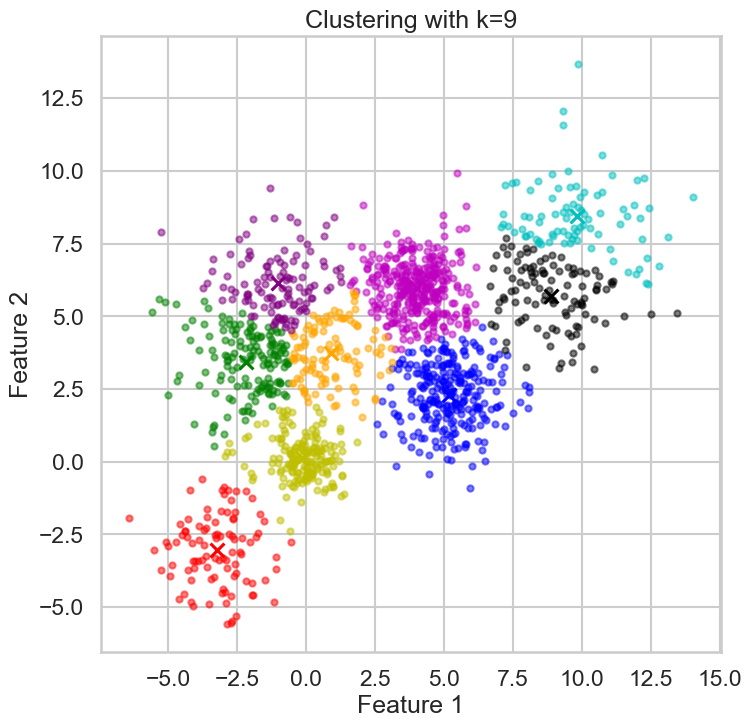

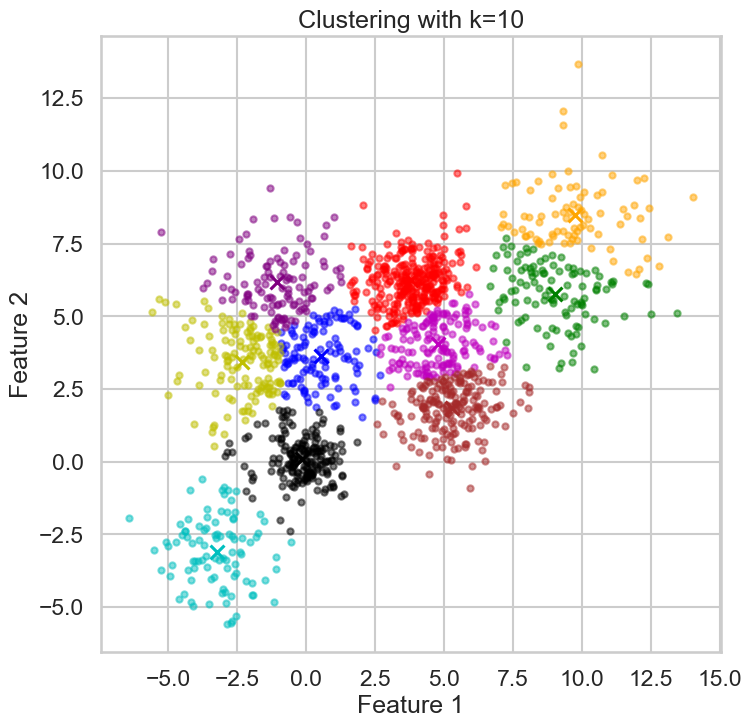

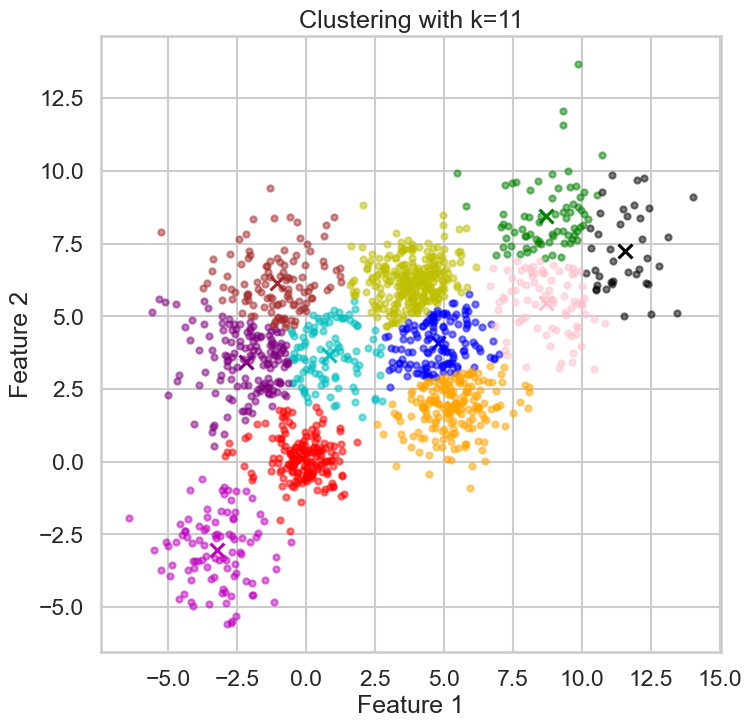

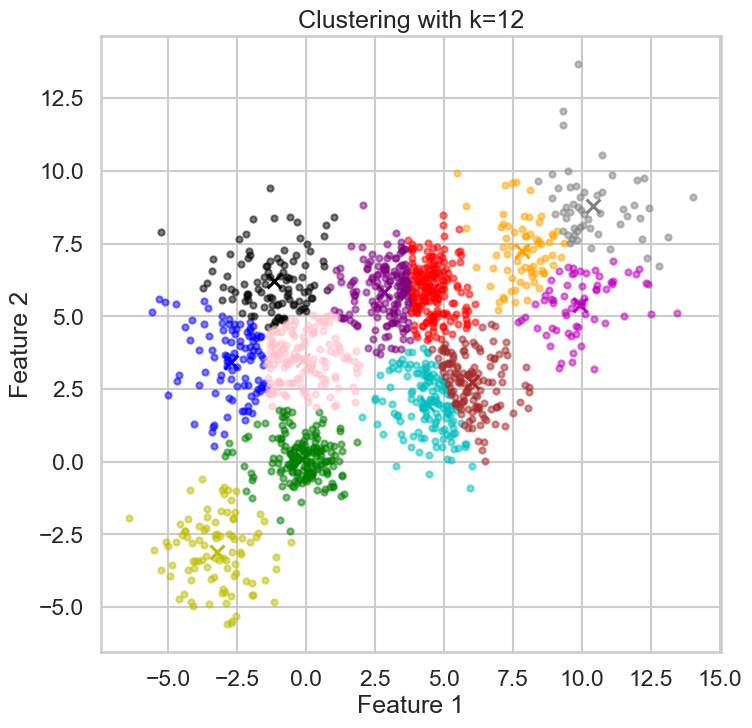

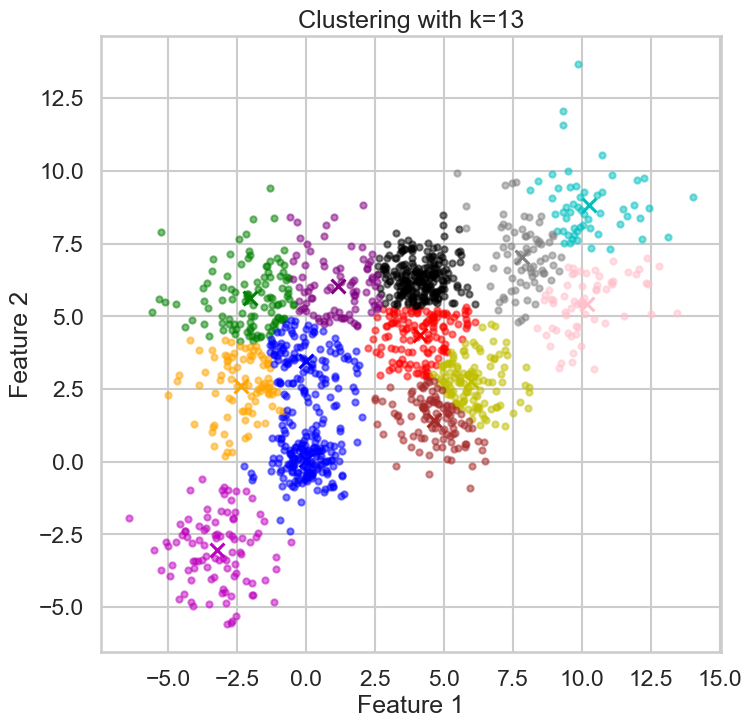

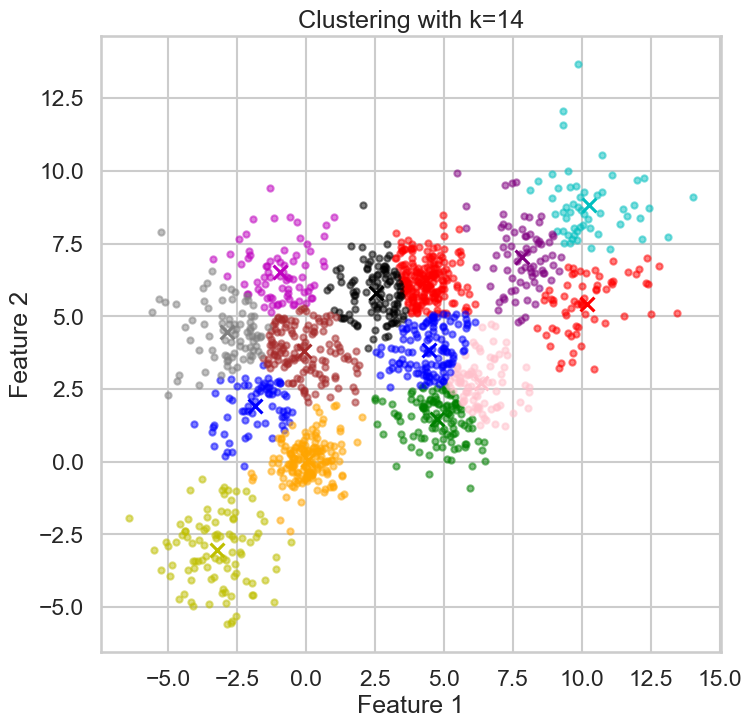

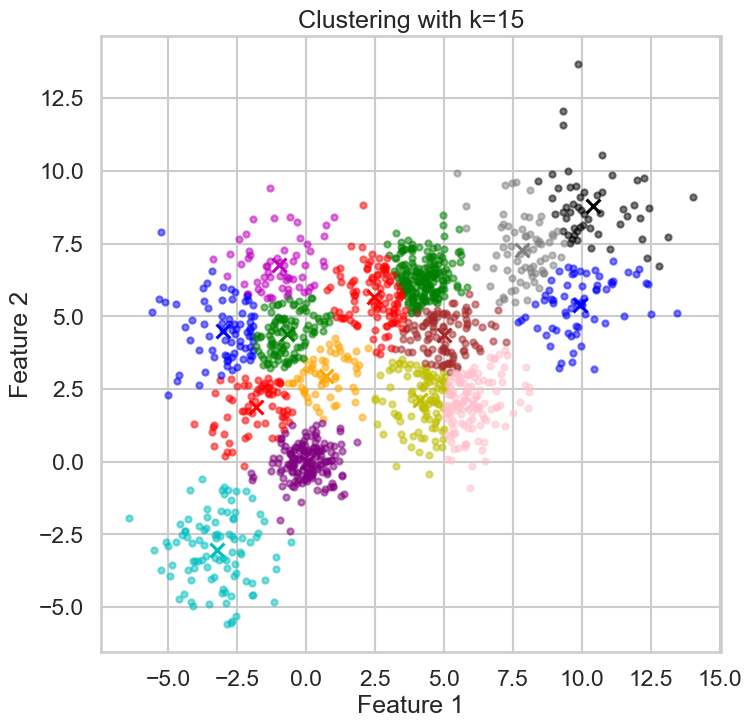

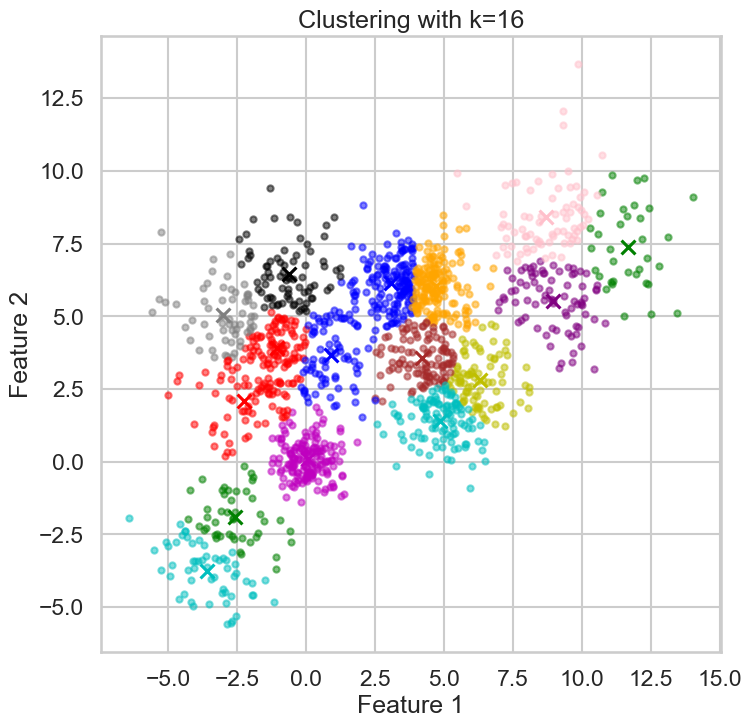

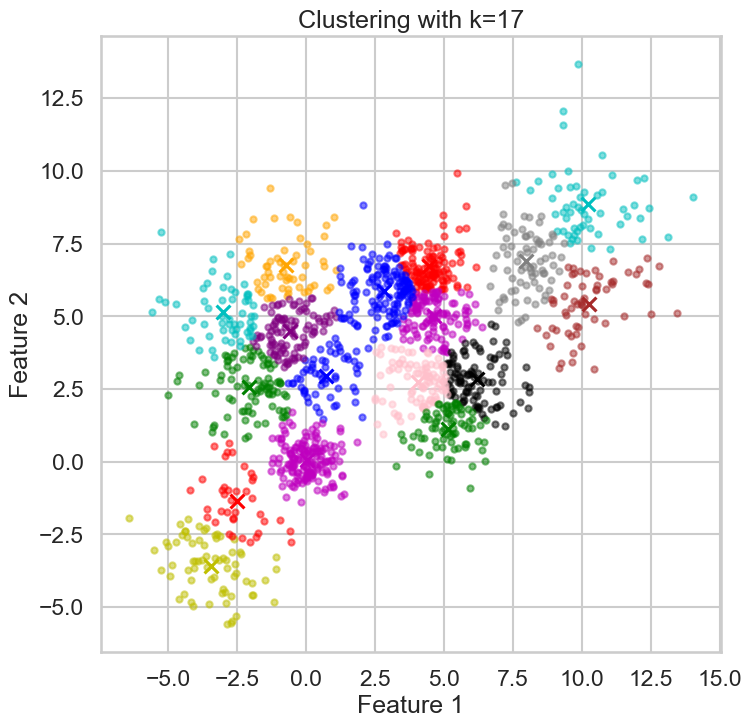

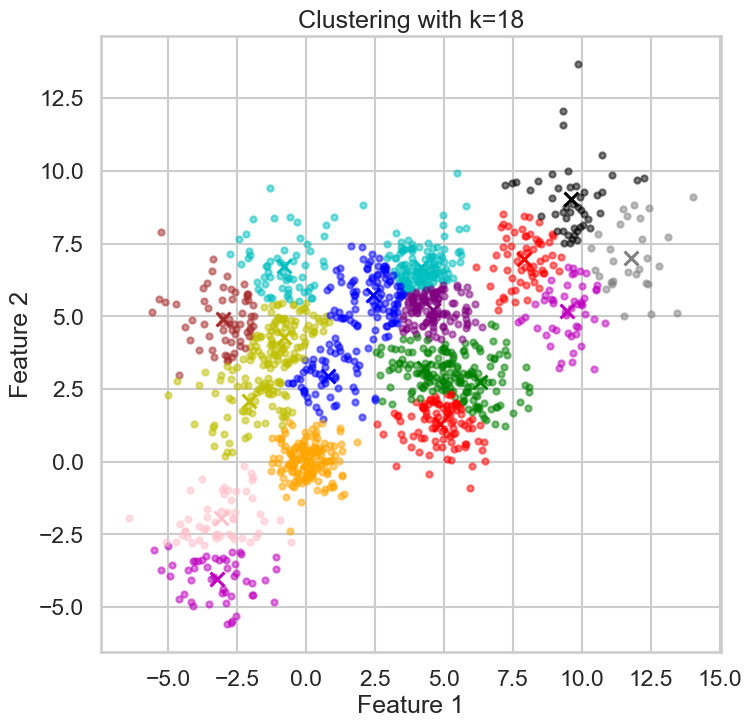

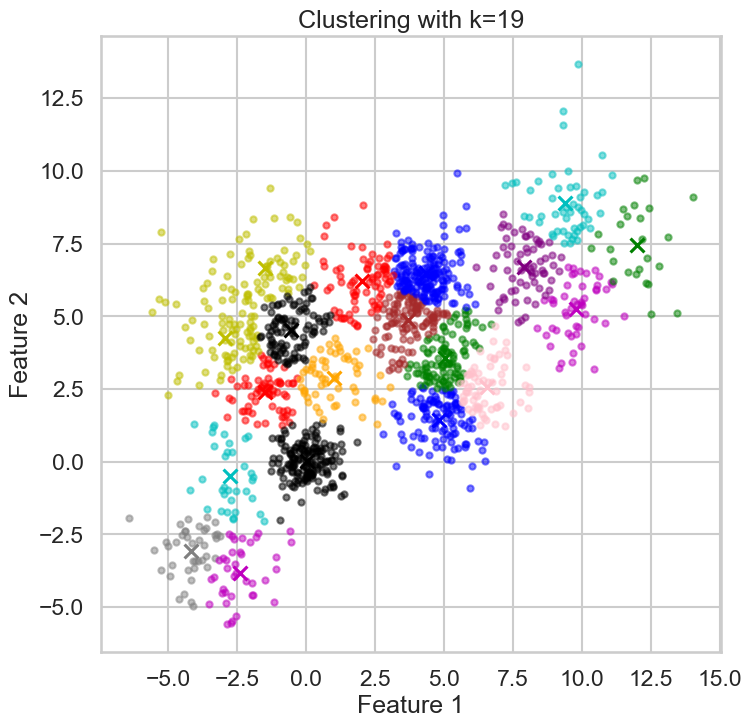

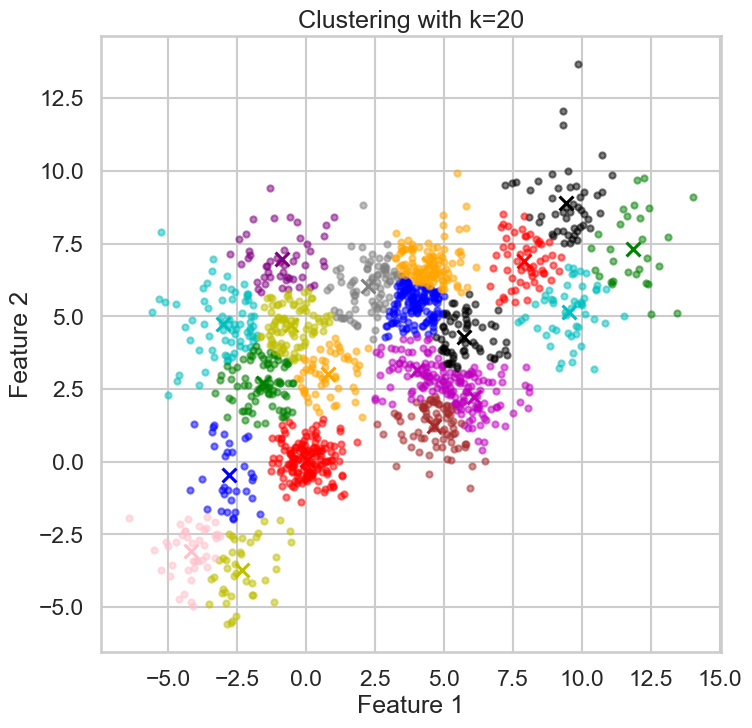

In [6]:
k_values = range(2, 21)
distortions = [] 

for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(df[['Feature1','Feature2']])    
    distortion = km.inertia_
    distortions.append(distortion)
    display_cluster(df[['Feature1','Feature2']].values, km=km , num_clusters=k)

distortion function for K means in multiblob data

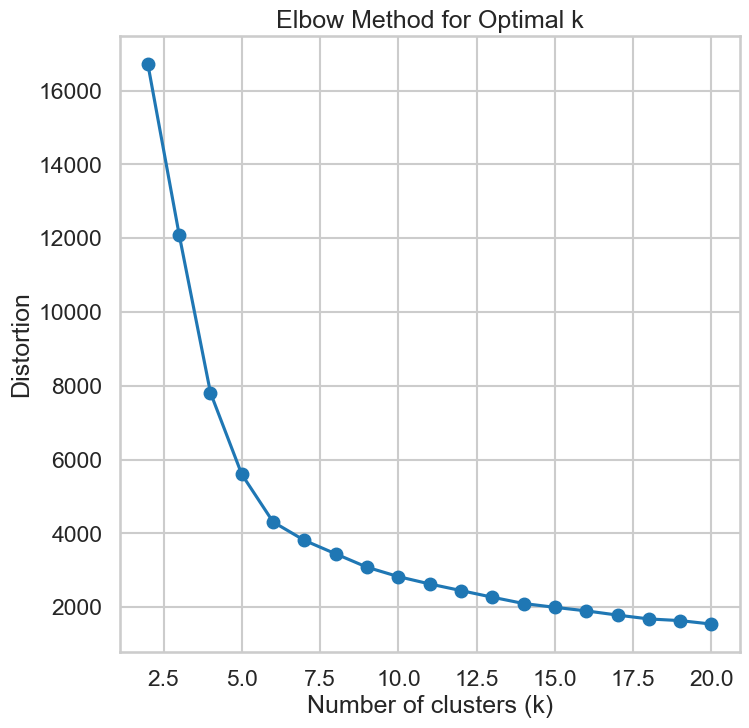

In [7]:
# Plot distortion values
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

Here the best value of K = 6 using the elbow method.

## Validating using silhouette score (K-means Multiblob data)


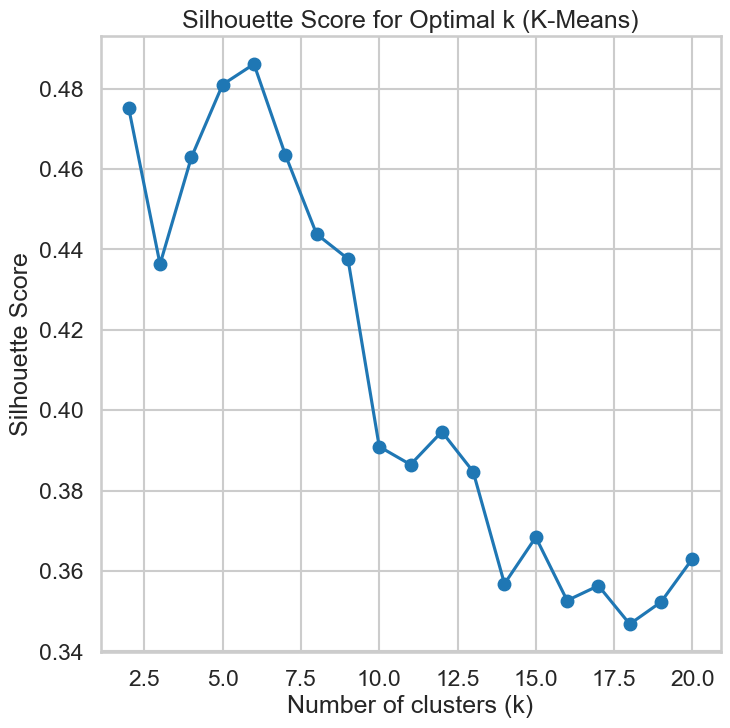

In [8]:
k_values = range(2, 21)
K_Means_silhouette_scores = []

for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(df[['Feature1', 'Feature2']])
    labels = km.labels_
    K_Means_silhouette_scores.append(silhouette_score(df[['Feature1', 'Feature2']], labels))

# Plot silhouette scores for different k values
plt.plot(k_values, K_Means_silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (K-Means)')
plt.show()

using the silhouette score we see that the maximum value is at K = 6 and after checking back the elbow method so we can observe that K = 6 is the optimal number of clusters for grouping this dataset

## Hierarchal Clustering Multiblob data

In [9]:
# Define the range of parameters
affinities = ['euclidean', 'cosine']
linkages = ['average', 'single']
distance_thresholds = range(2, 10)

best_silhouette_score = -1
best_parameters = {}

# Iterate over different parameter combinations
for affinity in affinities:
    for linkage_method in linkages:
        for distance_threshold in distance_thresholds:
            agg_clustering = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_method, distance_threshold=distance_threshold)
            # Fit the model to the data
            agg_clustering.fit(df[['Feature1', 'Feature2']])
            
            no_of_unique_clusters = len(np.unique(agg_clustering.labels_))
            
            print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
            print(no_of_unique_clusters)
            
            print("------------------------")
            
            if no_of_unique_clusters > 1:
                # Compute silhouette score
                silhouette_avg = silhouette_score(df[['Feature1', 'Feature2']], agg_clustering.labels_)
                # Check if the current silhouette score is the best so far
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_parameters = {'Affinity': affinity, 'Linkage': linkage_method, 'Distance Threshold': distance_threshold}

                # Display the resulting clusters
                print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
                print(f"Number of clusters: {agg_clustering.n_clusters_}")
                print(f"Silhouette Score: {silhouette_avg}\n")
                
                
                                # Plot dendrogram
#                 plt.figure(figsize=(10, 6))
#                 dendrogram(linkage(df[['Feature1', 'Feature2']], method=linkage_method, metric=affinity))
#                 plt.title(f'Dendrogram ({affinity.capitalize()} Affinity, {linkage_method.capitalize()} Linkage)')
#                 plt.xlabel('Samples')  # Fixing the x-axis label here
#                 plt.ylabel('Distance')
#                 plt.show()

# #               # Visualize clusters
#                 plt.figure(figsize=(8, 6))
#                 plt.scatter(df['Feature1'], df['Feature2'], c=agg_clustering.labels_, cmap='viridis')
#                 plt.title(f'Clusters for Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}')
#                 plt.xlabel('Feature1')  # Fixing the x-axis label here
#                 plt.ylabel('Feature2')
#                 plt.colorbar(label='Cluster')
#                 plt.show()
                
            else:
                continue
                

Affinity: euclidean, Linkage: average, Distance Threshold: 2
36
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 2
Number of clusters: 36
Silhouette Score: 0.3155710172095083

Affinity: euclidean, Linkage: average, Distance Threshold: 3
16
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 3
Number of clusters: 16
Silhouette Score: 0.35500586075131524

Affinity: euclidean, Linkage: average, Distance Threshold: 4
10
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 4
Number of clusters: 10
Silhouette Score: 0.37378418096239385

Affinity: euclidean, Linkage: average, Distance Threshold: 5
5
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 5
Number of clusters: 5
Silhouette Score: 0.433187948807373

Affinity: euclidean, Linkage: average, Distance Threshold: 6
3
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 6
Number o

### Hierarchal Clustering Best Parameters

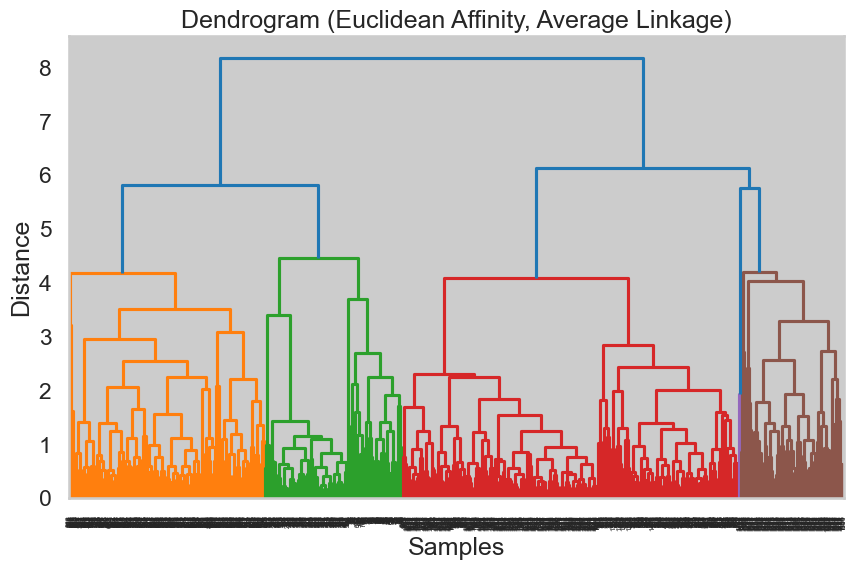

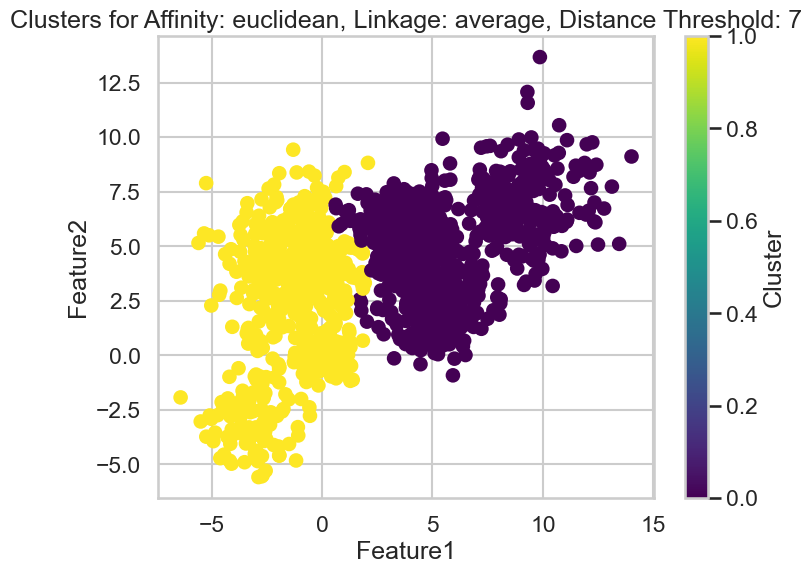

Best No.of clusters: 2
Best Parameters:
{'Affinity': 'euclidean', 'Linkage': 'average', 'Distance Threshold': 7}


In [10]:

plt.figure(figsize=(10, 6))
dendrogram(linkage(df[['Feature1', 'Feature2']], method=best_parameters['Linkage'], metric=best_parameters['Affinity']))
plt.title(f'Dendrogram ({best_parameters["Affinity"].capitalize()} Affinity, {best_parameters["Linkage"].capitalize()} Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


agg_clustering = AgglomerativeClustering(n_clusters=None, affinity=best_parameters['Affinity'], linkage=best_parameters['Linkage'], distance_threshold=best_parameters['Distance Threshold'])
# Fit the model to the data
agg_clustering.fit(df[['Feature1', 'Feature2']])
            

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=agg_clustering.labels_, cmap='viridis')
plt.title(f'Clusters for Affinity: {best_parameters["Affinity"]}, Linkage: {best_parameters["Linkage"]}, Distance Threshold: {best_parameters["Distance Threshold"]}')
plt.xlabel('Feature1')  # Fixing the x-axis label here
plt.ylabel('Feature2')
plt.colorbar(label='Cluster')
plt.show()

print(f"Best No.of clusters: {len(np.unique(agg_clustering.labels_))}")
print("Best Parameters:")
print(best_parameters)


## DBScan Clustering Multiblob data


In [11]:
# Define the range of parameters
EPS_range = np.linspace(0.1, 3, 30)
Min_samples_range = range(5, 26)

best_silhouette_score = -1
best_parameters = {}

# Iterate over different parameter combinations
for EPS in EPS_range:
    for Min_samples in Min_samples_range:
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        # Fit the model to the data
        dbscan.fit(df[['Feature1', 'Feature2']])
        no_of_unique_clusters = len(np.unique(dbscan.labels_))
            
        if no_of_unique_clusters > 1:
        
            # Compute silhouette score
            silhouette_avg = silhouette_score(df[['Feature1', 'Feature2']], dbscan.labels_)

#             # Plot the resulting clusters
#             plt.figure(figsize=(8, 6))
#             plt.scatter(df['Feature1'], df['Feature2'], c=dbscan.labels_, cmap='viridis')
#             plt.title(f'Clusters for EPS: {EPS}, Min_samples: {Min_samples}')
#             plt.xlabel('Feature1')
#             plt.ylabel('Feature2')
#             plt.colorbar(label='Cluster')
#             plt.show()

            # Print silhouette score and parameters
            print(f"EPS: {EPS}, Min_samples: {Min_samples}")
            print(f"Number of clusters: {len(np.unique(dbscan.labels_))}")  # Exclude noise label
            print(f"Silhouette Score: {silhouette_avg}\n")

            # Check if the current silhouette score is the best so far
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_parameters = {'EPS': EPS, 'Min_samples': Min_samples}
        else:
            continue


EPS: 0.1, Min_samples: 5
Number of clusters: 12
Silhouette Score: -0.5423348432605972

EPS: 0.1, Min_samples: 6
Number of clusters: 5
Silhouette Score: -0.5008065260955386

EPS: 0.2, Min_samples: 5
Number of clusters: 39
Silhouette Score: -0.3999643249301035

EPS: 0.2, Min_samples: 6
Number of clusters: 23
Silhouette Score: -0.4180866874540623

EPS: 0.2, Min_samples: 7
Number of clusters: 17
Silhouette Score: -0.48893307519972995

EPS: 0.2, Min_samples: 8
Number of clusters: 13
Silhouette Score: -0.44633773926928655

EPS: 0.2, Min_samples: 9
Number of clusters: 10
Silhouette Score: -0.44848274895257567

EPS: 0.2, Min_samples: 10
Number of clusters: 8
Silhouette Score: -0.4342356562032568

EPS: 0.2, Min_samples: 11
Number of clusters: 9
Silhouette Score: -0.44713367908702734

EPS: 0.2, Min_samples: 12
Number of clusters: 4
Silhouette Score: -0.4406511275226322

EPS: 0.2, Min_samples: 13
Number of clusters: 4
Silhouette Score: -0.44353913688654695

EPS: 0.2, Min_samples: 14
Number of clu

#### Plot silhouette score versus variation in EPS and Min_samples

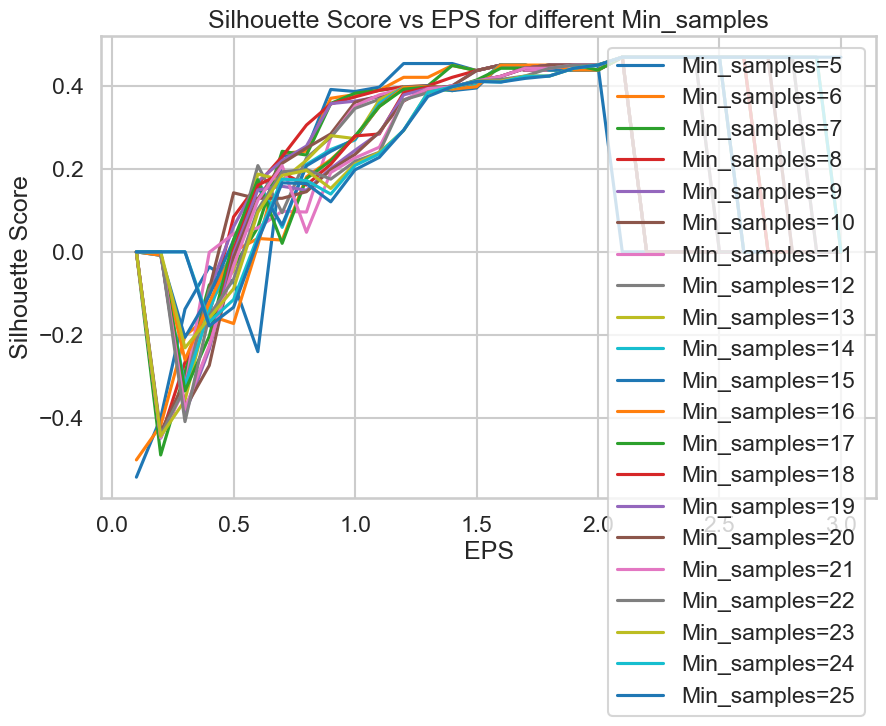

In [12]:
# Plot silhouette score versus variation in EPS and Min_samples
plt.figure(figsize=(10, 6))
for Min_samples in Min_samples_range:
    silhouette_scores = np.zeros_like(EPS_range)
    for i, EPS in enumerate(EPS_range):
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        dbscan.fit(df[['Feature1', 'Feature2']])
        no_of_unique_clusters = len(np.unique(dbscan.labels_))
            
        if no_of_unique_clusters > 1:
            silhouette_scores[i] = silhouette_score(df[['Feature1', 'Feature2']], dbscan.labels_)
    plt.plot(EPS_range, silhouette_scores, label=f'Min_samples={Min_samples}')
plt.xlabel('EPS')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs EPS for different Min_samples')
plt.legend()
plt.show()

### DBSCAN Best Parameters

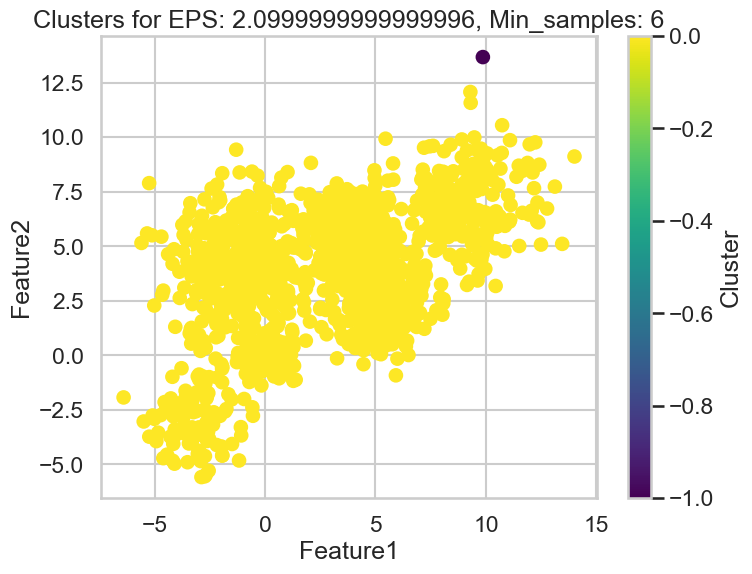

Best parameters:
{'EPS': 2.0999999999999996, 'Min_samples': 6}
Best Silhouette Score: 0.4685207355522043
Best No.of Clusters: 2


In [13]:
# Create a DBSCAN instance with the best parameters
best_dbscan = DBSCAN(eps=best_parameters['EPS'], min_samples=best_parameters['Min_samples'])

# Fit the model to the data
best_dbscan.fit(df[['Feature1', 'Feature2']])

# Plot the resulting clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=best_dbscan.labels_, cmap='viridis')
plt.title(f'Clusters for EPS: {best_parameters["EPS"]}, Min_samples: {best_parameters["Min_samples"]}')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.colorbar(label='Cluster')
plt.show()

# Print the best parameters
print("Best parameters:")
print(best_parameters)
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best No.of Clusters: {len(np.unique(best_dbscan.labels_))}")





### Gaussian Mixture for Multiblob
 

In [14]:
covariance_types = ['full', 'tied', 'diag', 'spherical']

In [15]:
k_values = range(2, 11)
GMM_silhouette_scores = []

best_silhouette_score = -1
best_k = None
best_covariance_type = None

for k in k_values:
    for covariance_type in covariance_types:
        # Create and fit the Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, covariance_type=covariance_type, random_state=42)
        gmm.fit(df[['Feature1', 'Feature2']])

        # Calculate silhouette score
        labels = gmm.predict(df[['Feature1', 'Feature2']])
        silhouette_avg = silhouette_score(df[['Feature1', 'Feature2']], labels)
        GMM_silhouette_scores.append(silhouette_avg)

        # Check if the current silhouette score is better than the previous best score
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_k = k
            best_covariance_type = covariance_type

# Print the best silhouette score, K, and covariance type
print("Best Silhouette Score:", best_silhouette_score)
print("Best K:", best_k)
print("Best Covariance Type:", best_covariance_type)


Best Silhouette Score: 0.4746189699249217
Best K: 2
Best Covariance Type: spherical


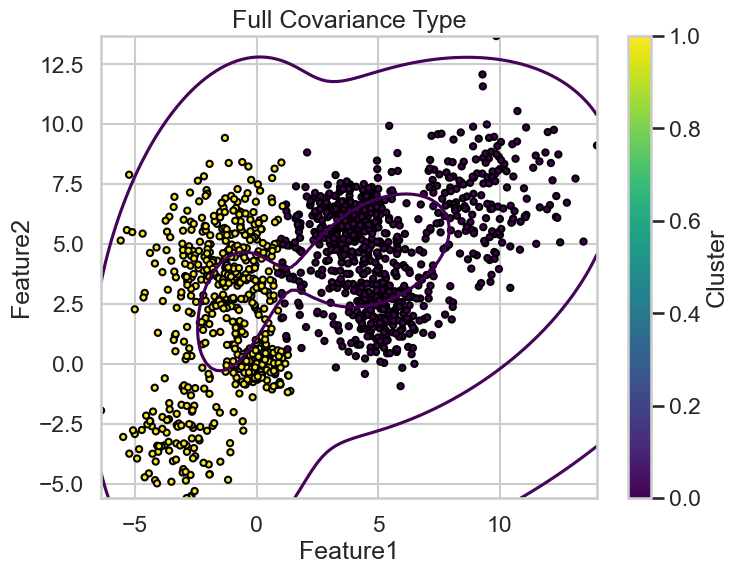

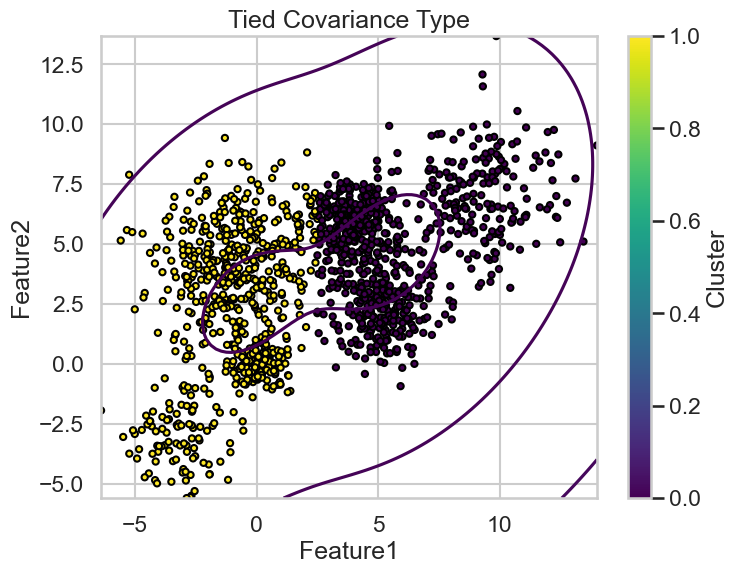

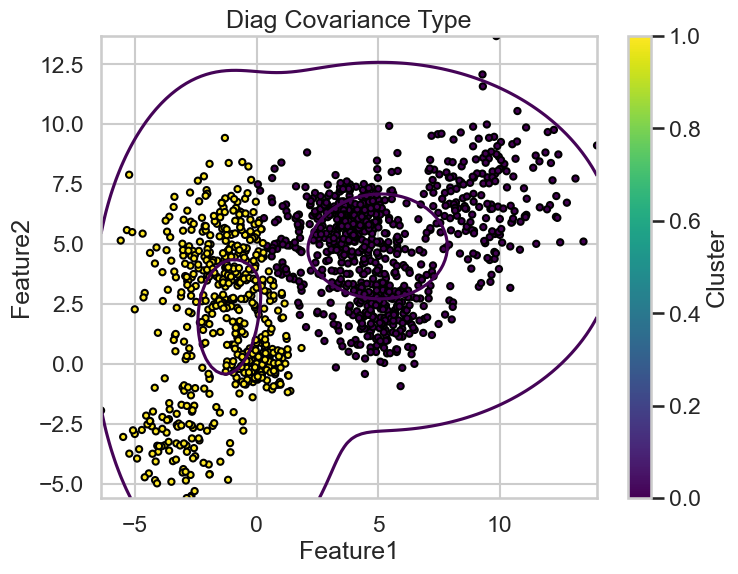

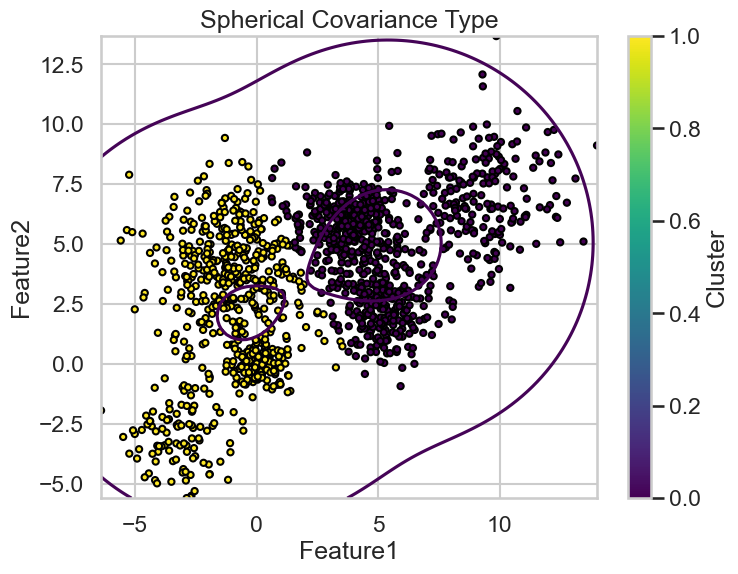

In [16]:
for covariance_type in covariance_types:
    # Create and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=2, covariance_type=covariance_type, random_state=42)
    gmm.fit(df[['Feature1', 'Feature2']])

    # Create a meshgrid for plotting the contour plot
    x = np.linspace(df['Feature1'].min(), df['Feature1'].max(), 100)
    y = np.linspace(df['Feature2'].min(), df['Feature2'].max(), 100)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    
    # Get the probabilities for each point in the meshgrid
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X.shape)
    
    # Plot the contour plot
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10), cmap='viridis')
    plt.scatter(df['Feature1'], df['Feature2'], c=gmm.predict(df[['Feature1', 'Feature2']]), cmap='viridis', s=20, edgecolor='k')
    plt.title(f'{covariance_type.capitalize()} Covariance Type')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.colorbar(label='Cluster')
    plt.show()


## Choosing clustering technique for Multiblob data 

**KMeans** 
- Best Silhouette Score: 0.48...
- K = 6

**Hierarical**
- Best Silhouette Score: 0.4685207355522043
- K = 2

**DBscan**
- Best Silhouette Score: 0.4685207355522043
- K = 2

**GMM**
- Best Silhouette Score: 0.4746189699249217
- K: 2


We can find that the KMeans clustering has the highest Silhouette Score therefor it is the best clustering technique with K = 6

# iris dataset 

In [17]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

In [18]:
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

In [19]:
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

## K-Means iris dataset

Here I have choosen the values of k to be 2 - 10 because we have more than 2 features in order to decrease the run time due to the fact the we try different combinations  of each 2 features 

In [20]:
# Define pairs of features
feature_pairs = list(combinations(iris_df.columns, 2))

# Define range of k values
k_values = range(2, 11)
distortions = [] 

# Loop over each k value
for k in k_values:
    
  #  print("------------------------------------------------------------------------------------------------------")
    km = KMeans(n_clusters=k)
    km.fit(iris_df)    
    distortion = km.inertia_
    distortions.append(distortion)
    
#     # Plot clusters for each pair of features
#     for pair in feature_pairs:
#         plt.figure(figsize=(8, 6))
#         plt.title(f'Clustering with k={k}') 
#         display_cluster(iris_df[list(pair)].values, km=km, num_clusters=k,feature1= pair[0] ,feature2=pair[1]) 
#         plt.show()


distortion function for K means

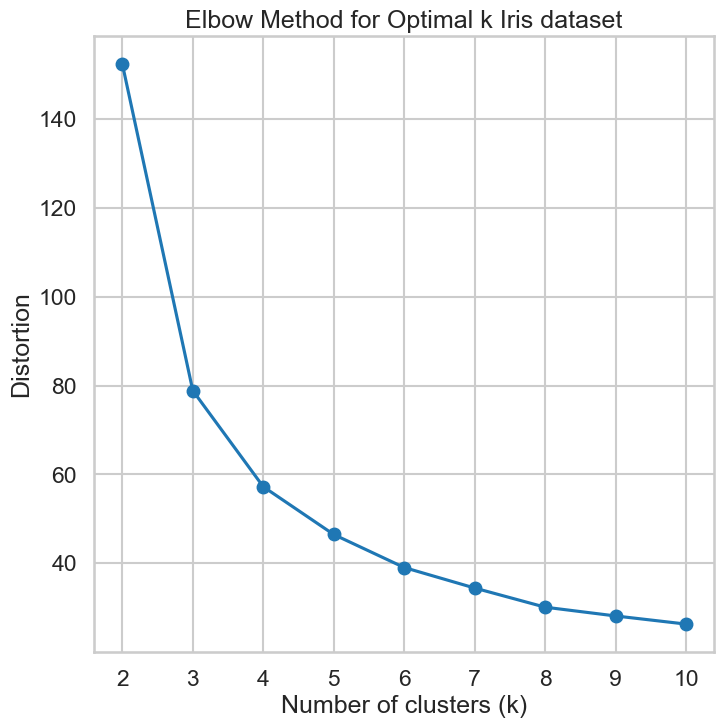

In [21]:
# Plot distortion values
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k Iris dataset')
plt.show()

In [22]:
max(K_Means_silhouette_scores)

0.48609408962389006

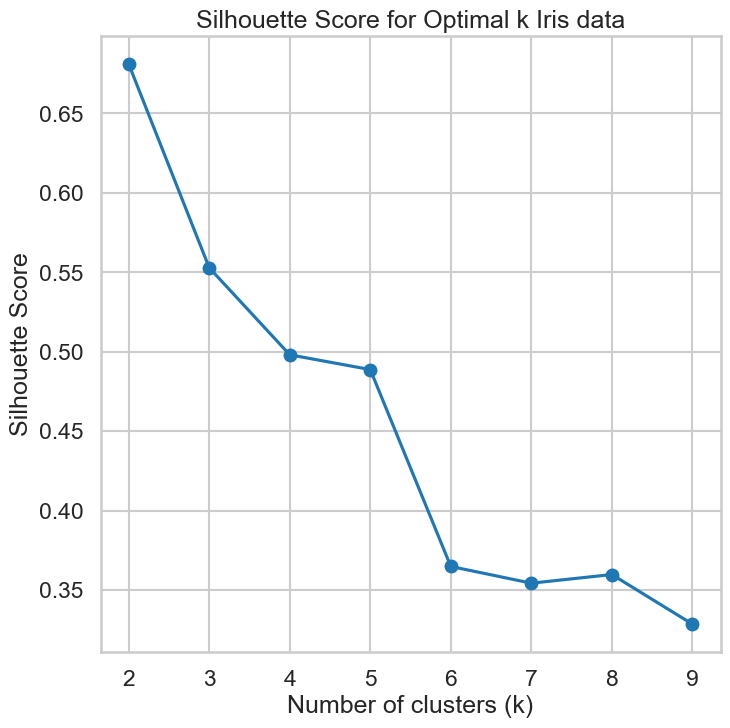

Best silhouette_score: 0.6810461692117462


In [23]:
k_values = range(2, 10)
K_Means_silhouette_scores = []

for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(iris_df)
    labels = km.labels_
    K_Means_silhouette_scores.append(silhouette_score(iris_df, labels))

# Plot silhouette scores for different k values
plt.plot(k_values, K_Means_silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k Iris data')
plt.show()

print(f"Best silhouette_score: {max(K_Means_silhouette_scores)}")

using the silhouette score of the KMeans we observe that K = 2 is the optimal value

## Hierarchal Clustering iris dataset 

In [24]:
# Define the range of parameters
affinities = ['euclidean', 'cosine']
linkages = ['average', 'single']
distance_thresholds = range(2, 5)

best_silhouette_score = -1
best_parameters = {}

# Iterate over different parameter combinations
for affinity in affinities:
    for linkage_method in linkages:
        for distance_threshold in distance_thresholds:
            agg_clustering = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_method, distance_threshold=distance_threshold)
            # Fit the model to the data
            agg_clustering.fit(iris_df)
            
            no_of_unique_clusters = len(np.unique(agg_clustering.labels_))
            
            print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
            print(no_of_unique_clusters)
            
            print("------------------------")
            
            if no_of_unique_clusters > 1:
                # Compute silhouette score
                silhouette_avg = silhouette_score(iris_df, agg_clustering.labels_)
                # Check if the current silhouette score is the best so far
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_parameters = {'Affinity': affinity, 'Linkage': linkage_method, 'Distance Threshold': distance_threshold}

                # Display the resulting clusters
                print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
                print(f"Number of clusters: {agg_clustering.n_clusters_}")
                print(f"Silhouette Score: {silhouette_avg}\n")
                
                
#                                 # Plot dendrogram
#                 plt.figure(figsize=(10, 6))
#                 dendrogram(linkage(iris_df, method=linkage_method, metric=affinity))
#                 plt.title(f'Dendrogram ({affinity.capitalize()} Affinity, {linkage_method.capitalize()} Linkage)')
#                 plt.xlabel('Samples')  # Fixing the x-axis label here
#                 plt.ylabel('Distance')
#                 plt.show()
                
                
#                 # Plot clusters for each pair of features
#                 for pair in feature_pairs:
#                     plt.figure(figsize=(8, 6))
#                     plt.title(f'Clustering with k={k}') 
                    
#                     plt.scatter(iris_df[pair[0]],iris_df[pair[1]], c=agg_clustering.labels_, cmap='viridis')
#                     plt.title(f'Clusters for Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}')
#                     plt.xlabel(pair[0])  # Fixing the x-axis label here
#                     plt.ylabel(pair[1])
#                     plt.colorbar(label='Cluster')
#                     plt.show()
               
                
            else:
                continue
                

Affinity: euclidean, Linkage: average, Distance Threshold: 2
2
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 2
Number of clusters: 2
Silhouette Score: 0.6867350732769776

Affinity: euclidean, Linkage: average, Distance Threshold: 3
2
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 3
Number of clusters: 2
Silhouette Score: 0.6867350732769776

Affinity: euclidean, Linkage: average, Distance Threshold: 4
2
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 4
Number of clusters: 2
Silhouette Score: 0.6867350732769776

Affinity: euclidean, Linkage: single, Distance Threshold: 2
1
------------------------
Affinity: euclidean, Linkage: single, Distance Threshold: 3
1
------------------------
Affinity: euclidean, Linkage: single, Distance Threshold: 4
1
------------------------
Affinity: cosine, Linkage: average, Distance Threshold: 2
1
------------------------
Affinity: cosine, Linkage: 

### Hierarchal Clustering Best Parameters iris dataset

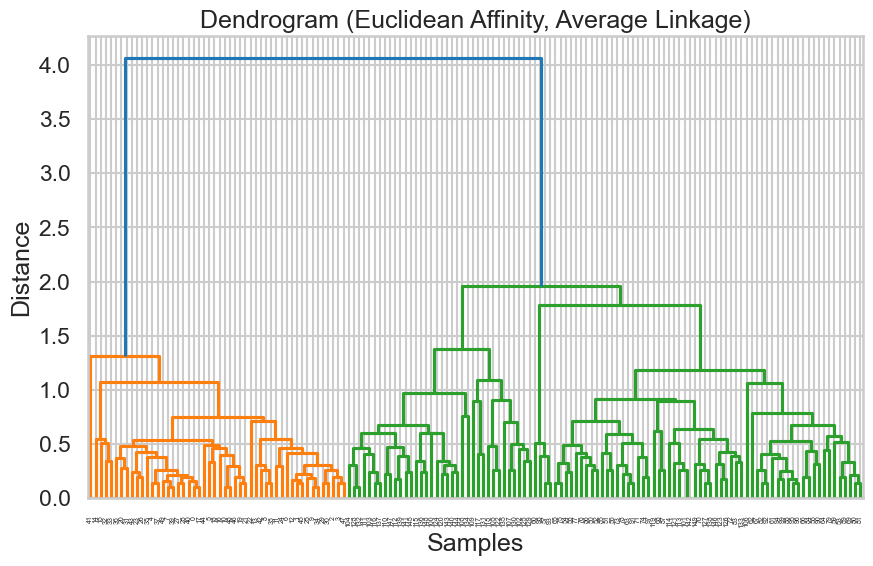

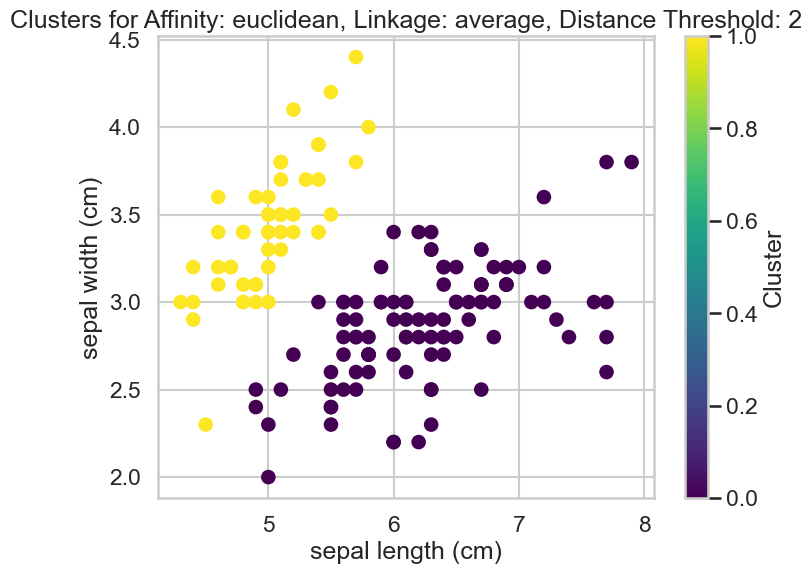

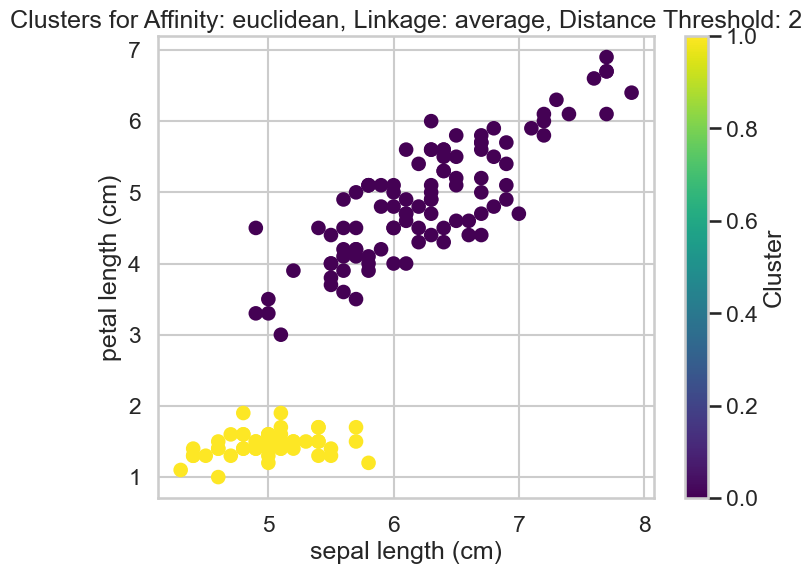

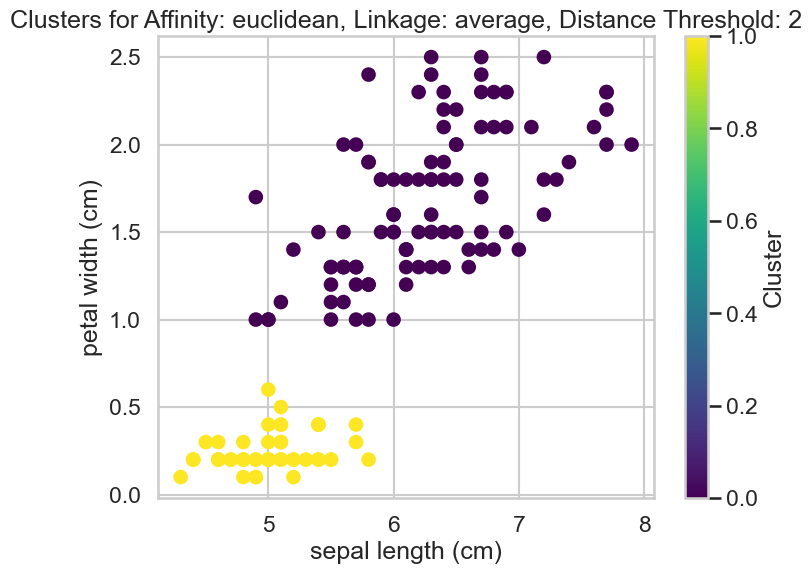

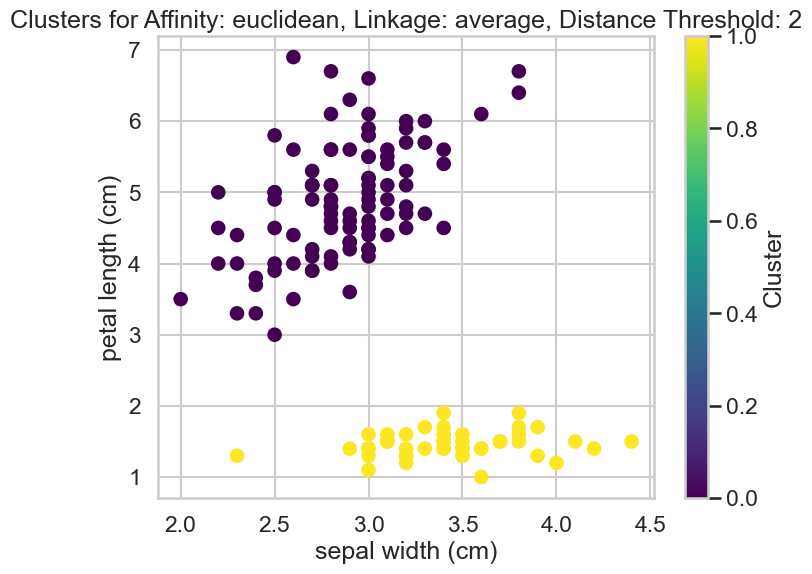

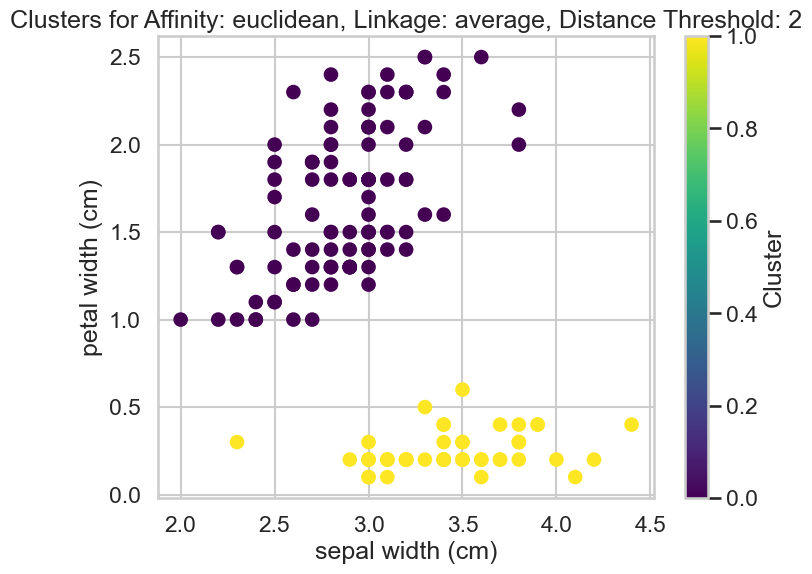

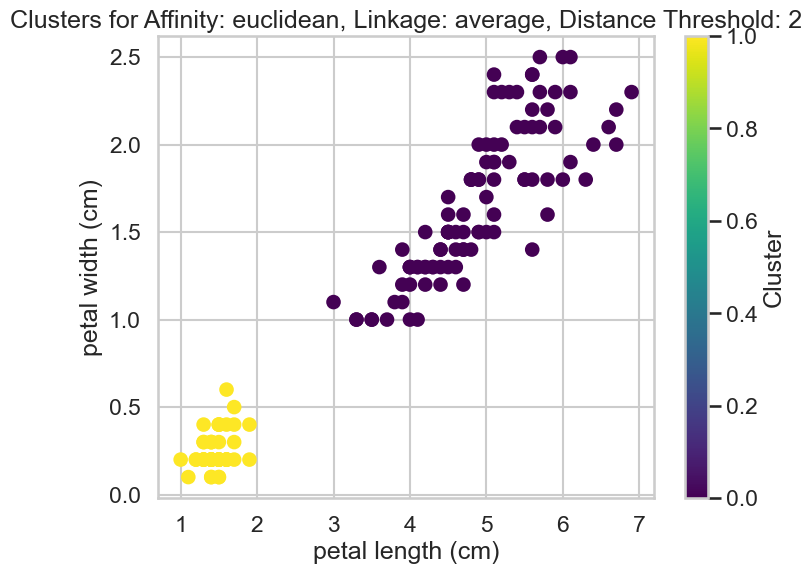

Best No.of clusters: 2
Best Parameters:
{'Affinity': 'euclidean', 'Linkage': 'average', 'Distance Threshold': 2}
Best silhouette score: 0.6867350732769776


In [25]:
plt.figure(figsize=(10, 6))
dendrogram(linkage(iris_df, method=best_parameters['Linkage'], metric=best_parameters['Affinity']))
plt.title(f'Dendrogram ({best_parameters["Affinity"].capitalize()} Affinity, {best_parameters["Linkage"].capitalize()} Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


agg_clustering = AgglomerativeClustering(n_clusters=None, affinity=best_parameters['Affinity'], linkage=best_parameters['Linkage'], distance_threshold=best_parameters['Distance Threshold'])
# Fit the model to the data
agg_clustering.fit(iris_df)


# Plot clusters for each pair of features
for pair in feature_pairs:
    plt.figure(figsize=(8, 6))
    plt.title(f'Clustering with k={k}') 

    plt.scatter(iris_df[pair[0]],iris_df[pair[1]], c=agg_clustering.labels_, cmap='viridis')
    plt.title(f'Clusters for Affinity: {best_parameters["Affinity"]}, Linkage: {best_parameters["Linkage"]}, Distance Threshold: {best_parameters["Distance Threshold"]}')
    plt.xlabel(pair[0])  # Fixing the x-axis label here
    plt.ylabel(pair[1])
    plt.colorbar(label='Cluster')
    plt.show()

print(f"Best No.of clusters: {len(np.unique(agg_clustering.labels_))}")
print("Best Parameters:")
print(best_parameters)

print(f"Best silhouette score: {best_silhouette_score}")


## DBscan iris 

In [26]:
# Define the range of parameters
EPS_range = np.linspace(0.1, 3, 10)
Min_samples_range = range(5, 16)

best_silhouette_score = -1
best_parameters = {}

# Iterate over different parameter combinations
for EPS in EPS_range:
    for Min_samples in Min_samples_range:
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        # Fit the model to the data
        dbscan.fit(iris_df)
        no_of_unique_clusters = len(np.unique(dbscan.labels_))
            
        if no_of_unique_clusters > 1:
        
            # Compute silhouette score
            silhouette_avg = silhouette_score(iris_df, dbscan.labels_)

#            # Plot clusters for each pair of features
#             for pair in feature_pairs:
#                 plt.figure(figsize=(8, 6)) 
#                 plt.title(f'Clusters for EPS: {EPS}, Min_samples: {Min_samples}')
#                 plt.scatter(iris_df[pair[0]],iris_df[pair[1]], c=dbscan.labels_, cmap='viridis')
#                 plt.xlabel(pair[0])  # Fixing the x-axis label here
#                 plt.ylabel(pair[1])
#                 plt.colorbar(label='Cluster')
#                 plt.show()


            # Print silhouette score and parameters
            print(f"EPS: {EPS}, Min_samples: {Min_samples}")
            print(f"Number of clusters: {len(np.unique(dbscan.labels_))}")  # Exclude noise label
            print(f"Silhouette Score: {silhouette_avg}\n")

            # Check if the current silhouette score is the best so far
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_parameters = {'EPS': EPS, 'Min_samples': Min_samples}
        else:
            continue


EPS: 0.42222222222222217, Min_samples: 5
Number of clusters: 4
Silhouette Score: 0.35789153664694195

EPS: 0.42222222222222217, Min_samples: 6
Number of clusters: 5
Silhouette Score: 0.2810033011457035

EPS: 0.42222222222222217, Min_samples: 7
Number of clusters: 8
Silhouette Score: 0.22485846560895406

EPS: 0.42222222222222217, Min_samples: 8
Number of clusters: 6
Silhouette Score: 0.18425548939583086

EPS: 0.42222222222222217, Min_samples: 9
Number of clusters: 4
Silhouette Score: 0.18337103823928563

EPS: 0.42222222222222217, Min_samples: 10
Number of clusters: 4
Silhouette Score: 0.13748588278565133

EPS: 0.42222222222222217, Min_samples: 11
Number of clusters: 3
Silhouette Score: 0.21821991130343737

EPS: 0.42222222222222217, Min_samples: 12
Number of clusters: 3
Silhouette Score: 0.21419038893488737

EPS: 0.42222222222222217, Min_samples: 13
Number of clusters: 2
Silhouette Score: 0.5998657220519231

EPS: 0.42222222222222217, Min_samples: 14
Number of clusters: 2
Silhouette Score

#### Plot silhouette score versus variation in EPS and Min_samples

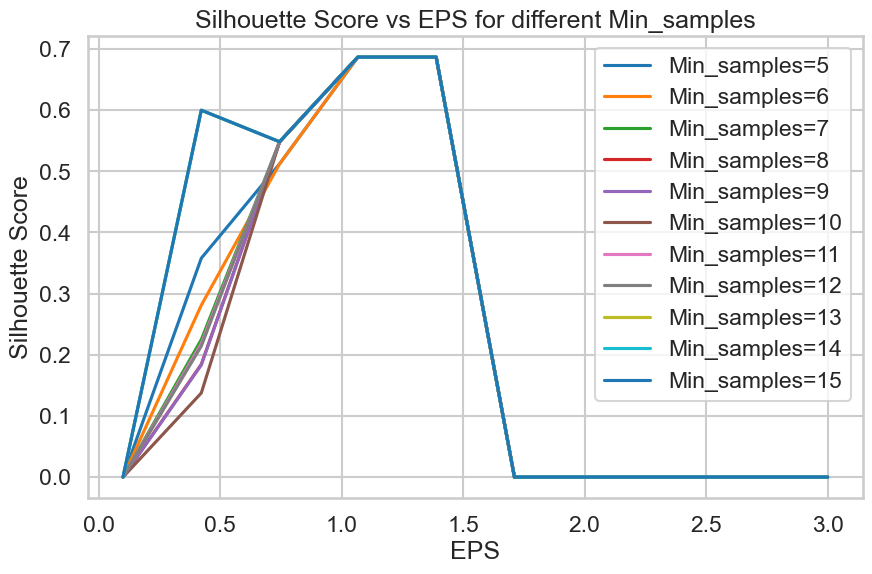

In [27]:
# Plot silhouette score versus variation in EPS and Min_samples
plt.figure(figsize=(10, 6))
for Min_samples in Min_samples_range:
    silhouette_scores = np.zeros_like(EPS_range)
    for i, EPS in enumerate(EPS_range):
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        dbscan.fit(iris_df)
        no_of_unique_clusters = len(np.unique(dbscan.labels_))
            
        if no_of_unique_clusters > 1:
            silhouette_scores[i] = silhouette_score(iris_df, dbscan.labels_)
    plt.plot(EPS_range, silhouette_scores, label=f'Min_samples={Min_samples}')
plt.xlabel('EPS')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs EPS for different Min_samples')
plt.legend()
plt.show()


## DBScan Best Parameters 

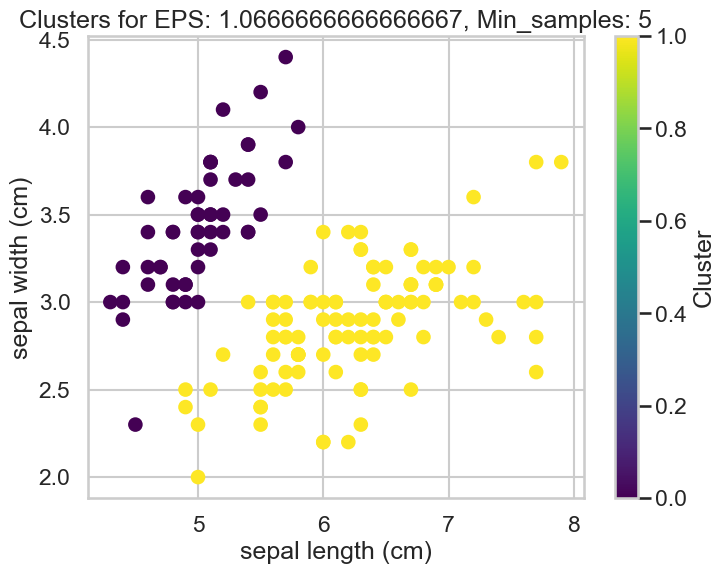

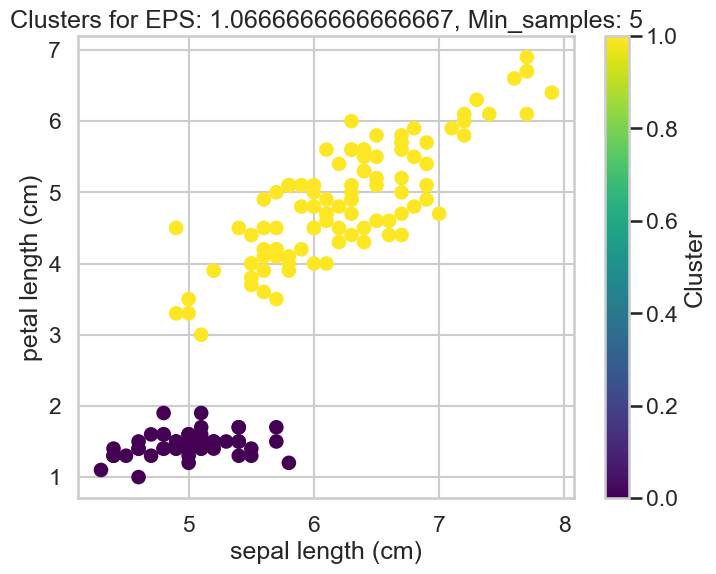

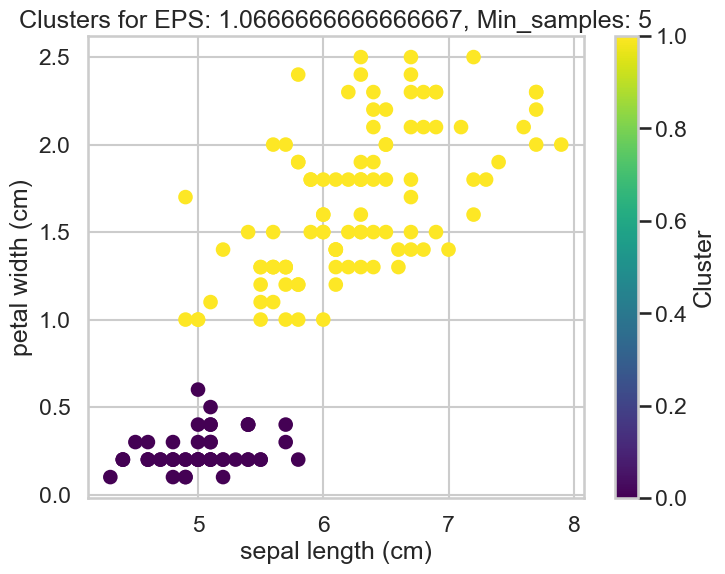

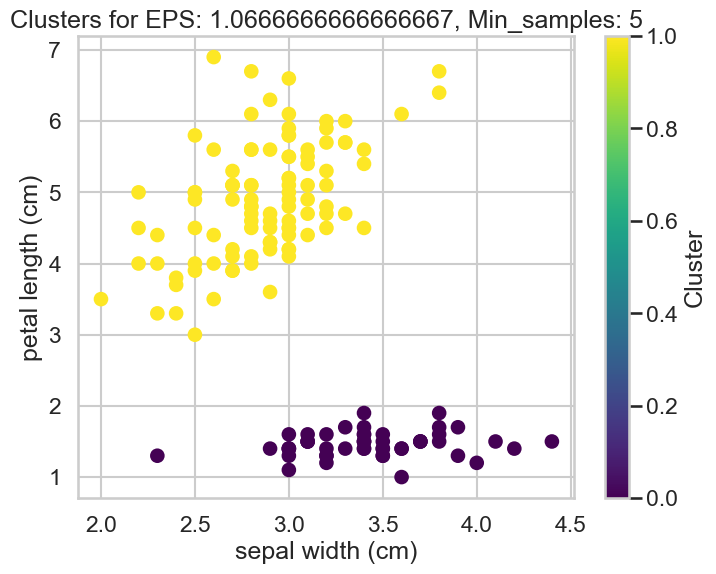

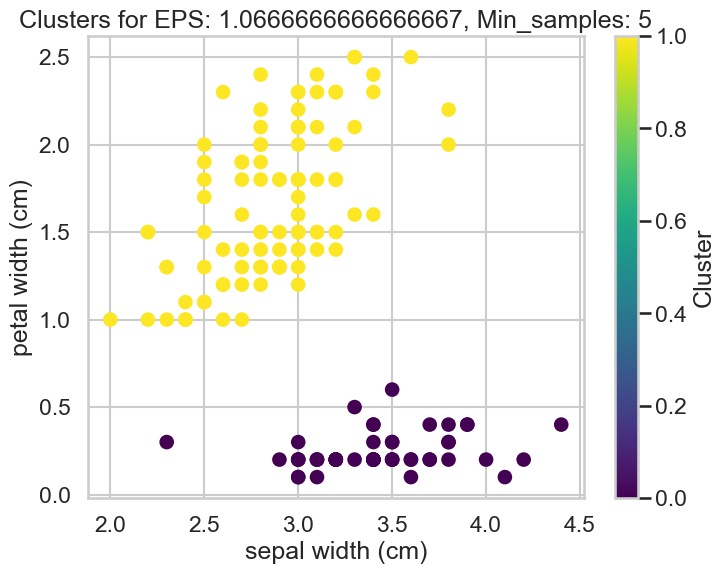

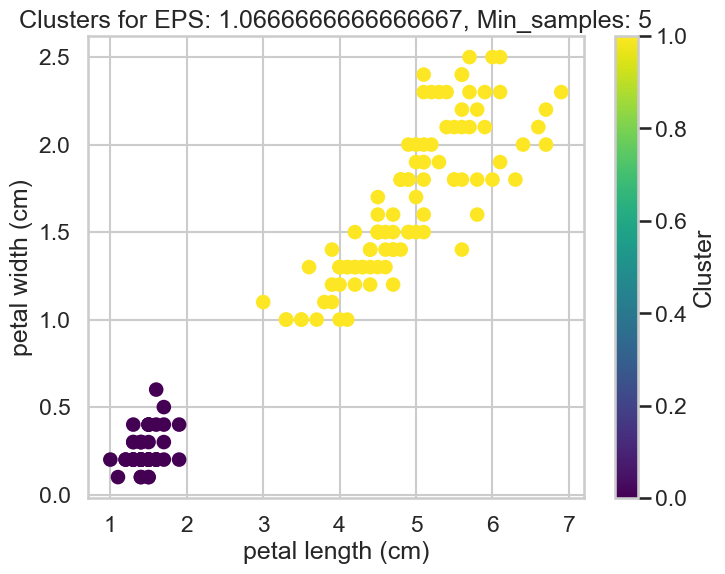

Best parameters:
{'EPS': 1.0666666666666667, 'Min_samples': 5}
Best Silhouette Score: 0.6867350732769776
Best No.of Clusters: 2


In [28]:
# Create a DBSCAN instance with the best parameters
best_dbscan = DBSCAN(eps=best_parameters['EPS'], min_samples=best_parameters['Min_samples'])

# Fit the model to the data
best_dbscan.fit(iris_df)


# Plot clusters for each pair of features
for pair in feature_pairs:
    plt.figure(figsize=(8, 6)) 
    plt.title(f'Clusters for EPS: {best_parameters["EPS"]}, Min_samples: {best_parameters["Min_samples"]}')
    plt.scatter(iris_df[pair[0]],iris_df[pair[1]], c=best_dbscan.labels_, cmap='viridis')
    plt.xlabel(pair[0])  # Fixing the x-axis label here
    plt.ylabel(pair[1])
    plt.colorbar(label='Cluster')
    plt.show()
    
# Print the best parameters
print("Best parameters:")
print(best_parameters)
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best No.of Clusters: {len(np.unique(best_dbscan.labels_))}")

## GMM iris 

In [29]:
# Define pairs of features
feature_pairs = list(combinations(iris_df.columns, 2))
k_values = range(2, 11)
GMM_silhouette_scores = []

best_silhouette_score = -1
best_k = None
best_covariance_type = None

for k in k_values:
    for covariance_type in covariance_types:
        # Create and fit the Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, covariance_type=covariance_type, random_state=42)
        gmm.fit(iris_df)

        # Calculate silhouette score
        labels = gmm.predict(iris_df)
        silhouette_avg = silhouette_score(iris_df, labels)
        GMM_silhouette_scores.append(silhouette_avg)

        # Check if the current silhouette score is better than the previous best score
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_k = k
            best_covariance_type = covariance_type

# Print the best silhouette score, K, and covariance type
print("Best Silhouette Score:", best_silhouette_score)
print("Best K:", best_k)
print("Best Covariance Type:", best_covariance_type)


Best Silhouette Score: 0.6867350732769776
Best K: 2
Best Covariance Type: full


In [30]:
# Define pairs of features
feature_pairs = list(combinations(iris_df.columns, 2))

for covariance_type in covariance_types:
    # Create and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=2, covariance_type=covariance_type, random_state=42)
    gmm.fit(iris_df)
    
    for pair in feature_pairs:
        for pair in feature_pairs:
            # Create a meshgrid for plotting the contour plot
            x = np.linspace(iris_df[pair[0]].min(), iris_df[pair[0]].max(), 100)
            y = np.linspace(iris_df[pair[1]].min(), iris_df[pair[1]].max(), 100)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T

            # Get the probabilities for each point in the meshgrid
            Z = -gmm.score_samples(np.hstack([XX, np.zeros((len(XX), 2))]))
            Z = Z.reshape(X.shape)

#             # Plot the contour plot
#             plt.figure(figsize=(8, 6))
#             plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10), cmap='viridis')
#             plt.scatter(iris_df[pair[0]], iris_df[pair[1]], c=gmm.predict(iris_df), cmap='viridis', s=20, edgecolor='k')
#             plt.title(f'GMM Contour Plot with {covariance_type.capitalize()} Covariance Type')
#             plt.xlabel(pair[0])
#             plt.ylabel(pair[1])
#             plt.colorbar(label='Cluster')
#             plt.show()

## Normalizing iris

In [31]:
# Normalize the data
scaler = StandardScaler()
iris_df_normalized = scaler.fit_transform(iris_df)
iris_df_normalized = pd.DataFrame(data=iris_df_normalized, columns=iris_df.columns)

## K-Means Normalized iris 

In [32]:
# Define pairs of features
feature_pairs = list(combinations(iris_df_normalized.columns, 2))

# Define range of k values
k_values = range(2, 11)
distortions = [] 

# Loop over each k value
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(iris_df_normalized)    
    distortion = km.inertia_
    distortions.append(distortion)
    
#     # Plot clusters for each pair of features
#     for pair in feature_pairs:
#         plt.figure(figsize=(8, 6))
#         plt.title(f'Clustering with k={k}') 
#         display_cluster(iris_df_normalized[list(pair)].values, km=km, num_clusters=k,feature1= pair[0] ,feature2=pair[1]) 
#         plt.show()

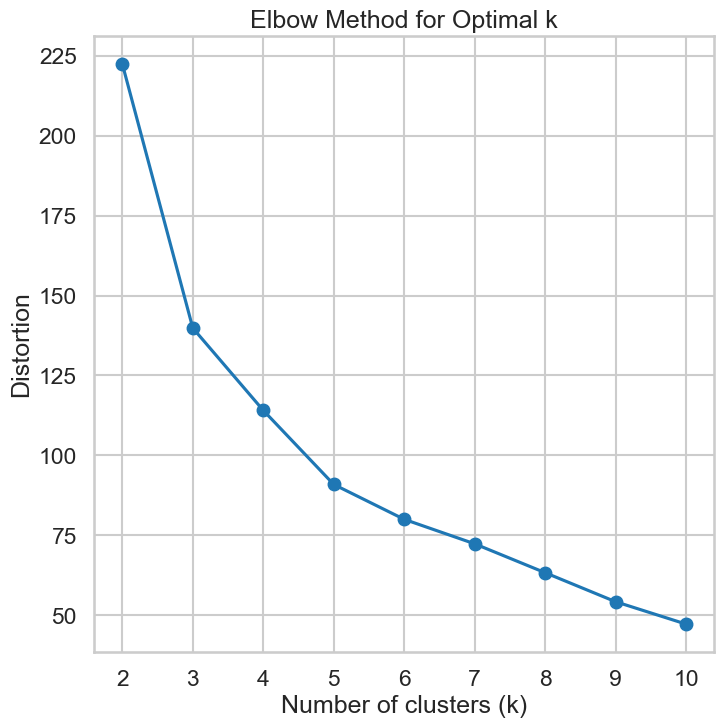

In [33]:
# Plot distortion values
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

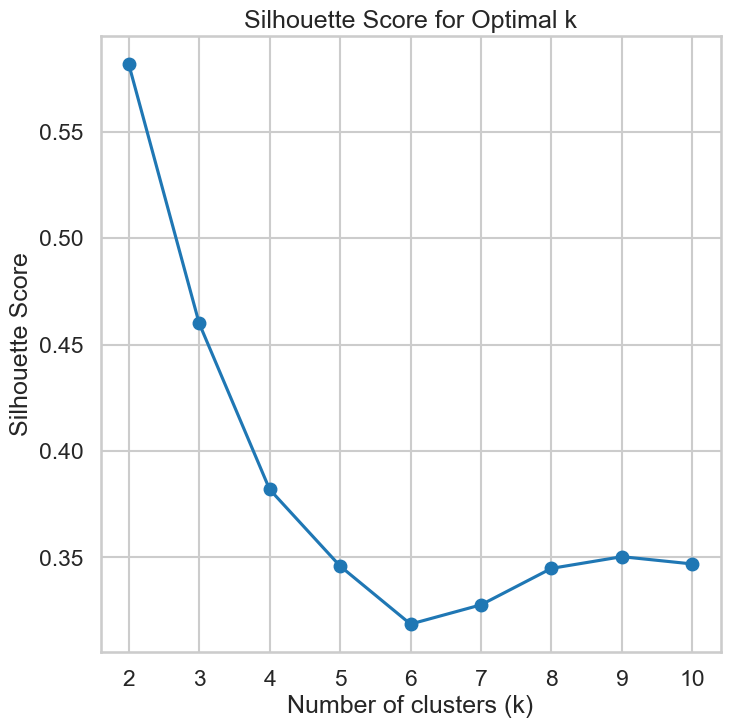

Best silhouette_score: 0.5817500491982808


In [34]:
k_values = range(2, 11)
K_Means_silhouette_scores = []

for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(iris_df_normalized)
    labels = km.labels_
    K_Means_silhouette_scores.append(silhouette_score(iris_df_normalized, labels))

# Plot silhouette scores for different k values
plt.plot(k_values, K_Means_silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()
print(f"Best silhouette_score: {max(K_Means_silhouette_scores)}")

## Hierarical Clustering Normalized iris

In [35]:
# Define the range of parameters
affinities = ['euclidean', 'cosine']
linkages = ['average', 'single']
distance_thresholds = range(2, 5)

best_silhouette_score = -1
best_parameters = {}

# Iterate over different parameter combinations
for affinity in affinities:
    for linkage_method in linkages:
        for distance_threshold in distance_thresholds:
            agg_clustering = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_method, distance_threshold=distance_threshold)
            # Fit the model to the data
            agg_clustering.fit(iris_df_normalized)
            
            no_of_unique_clusters = len(np.unique(agg_clustering.labels_))
            
            print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
            print(no_of_unique_clusters)
            
            print("------------------------")
            
            if no_of_unique_clusters > 1:
                # Compute silhouette score
                silhouette_avg = silhouette_score(iris_df_normalized, agg_clustering.labels_)
                # Check if the current silhouette score is the best so far
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_parameters = {'Affinity': affinity, 'Linkage': linkage_method, 'Distance Threshold': distance_threshold}

                # Display the resulting clusters
                print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
                print(f"Number of clusters: {agg_clustering.n_clusters_}")
                print(f"Silhouette Score: {silhouette_avg}\n")
                
                
#                                 # Plot dendrogram
#                 plt.figure(figsize=(10, 6))
#                 dendrogram(linkage(iris_df_normalized, method=linkage_method, metric=affinity))
#                 plt.title(f'Dendrogram ({affinity.capitalize()} Affinity, {linkage_method.capitalize()} Linkage)')
#                 plt.xlabel('Samples')  # Fixing the x-axis label here
#                 plt.ylabel('Distance')
#                 plt.show()
                
                
#                 # Plot clusters for each pair of features
#                 for pair in feature_pairs:
#                     plt.figure(figsize=(8, 6))
#                     plt.title(f'Clustering with k={k}') 
                    
#                     plt.scatter(iris_df_normalized[pair[0]],iris_df_normalized[pair[1]], c=agg_clustering.labels_, cmap='viridis')
#                     plt.title(f'Clusters for Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}')
#                     plt.xlabel(pair[0])  # Fixing the x-axis label here
#                     plt.ylabel(pair[1])
#                     plt.colorbar(label='Cluster')
#                     plt.show()                
               
                
            else:
                continue
                

Affinity: euclidean, Linkage: average, Distance Threshold: 2
6
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 2
Number of clusters: 6
Silhouette Score: 0.3248248440740702

Affinity: euclidean, Linkage: average, Distance Threshold: 3
3
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 3
Number of clusters: 3
Silhouette Score: 0.4802669329728697

Affinity: euclidean, Linkage: average, Distance Threshold: 4
1
------------------------
Affinity: euclidean, Linkage: single, Distance Threshold: 2
1
------------------------
Affinity: euclidean, Linkage: single, Distance Threshold: 3
1
------------------------
Affinity: euclidean, Linkage: single, Distance Threshold: 4
1
------------------------
Affinity: cosine, Linkage: average, Distance Threshold: 2
1
------------------------
Affinity: cosine, Linkage: average, Distance Threshold: 3
1
------------------------
Affinity: cosine, Linkage: average, Distance Threshold: 4
1
---

## Hierarical Normalized iris Best Parameters

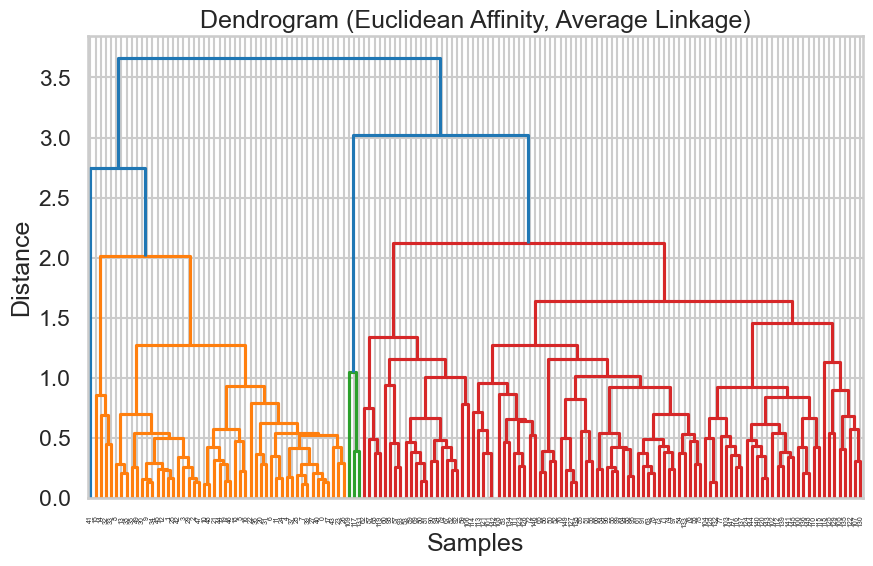

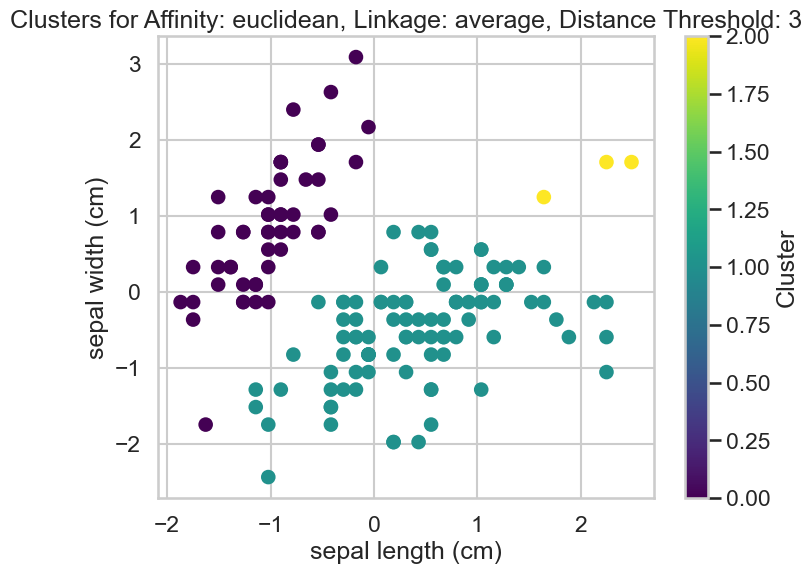

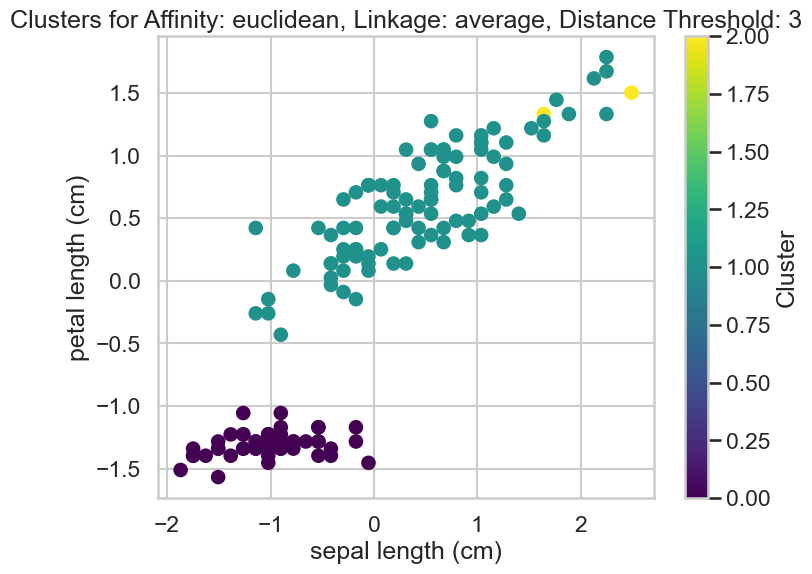

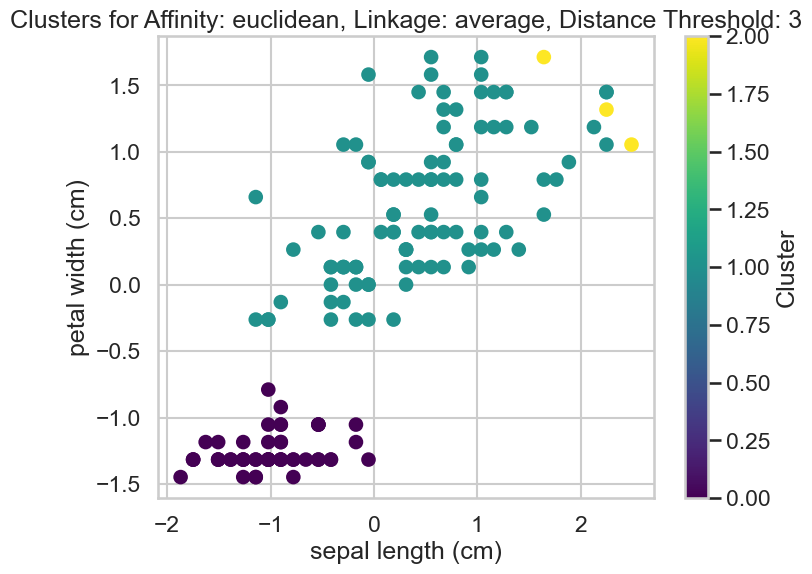

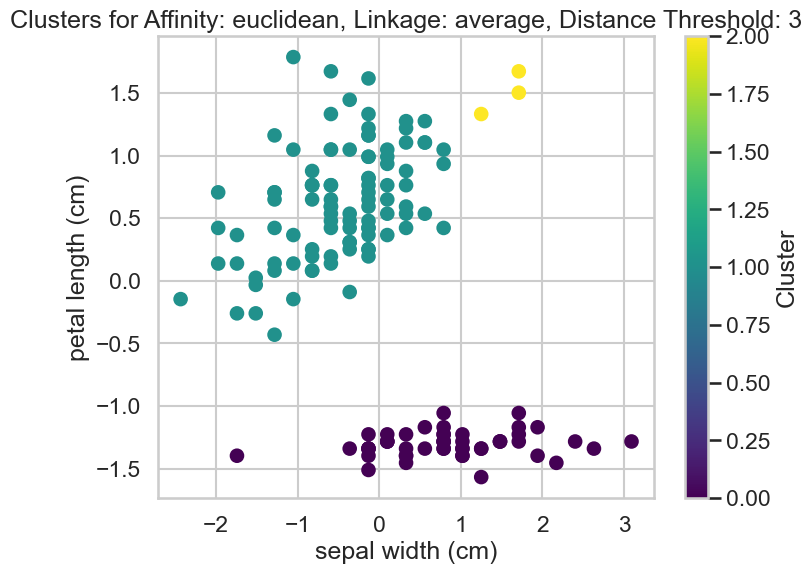

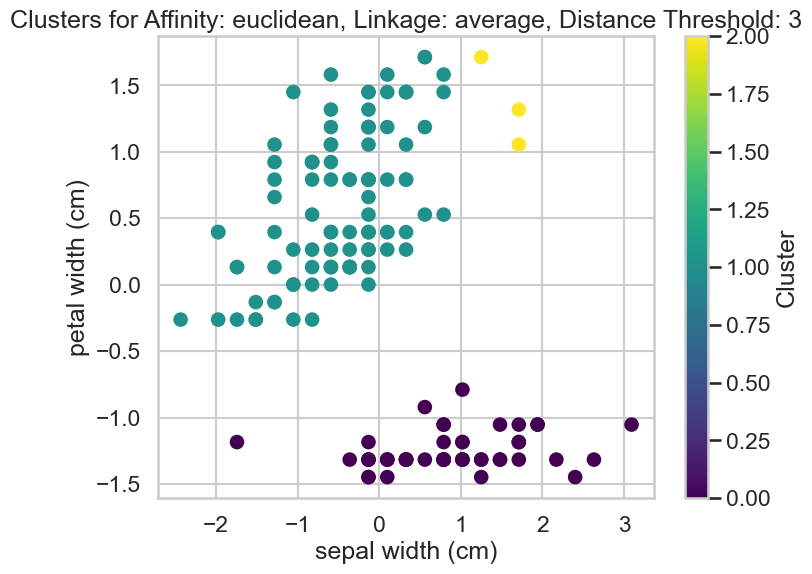

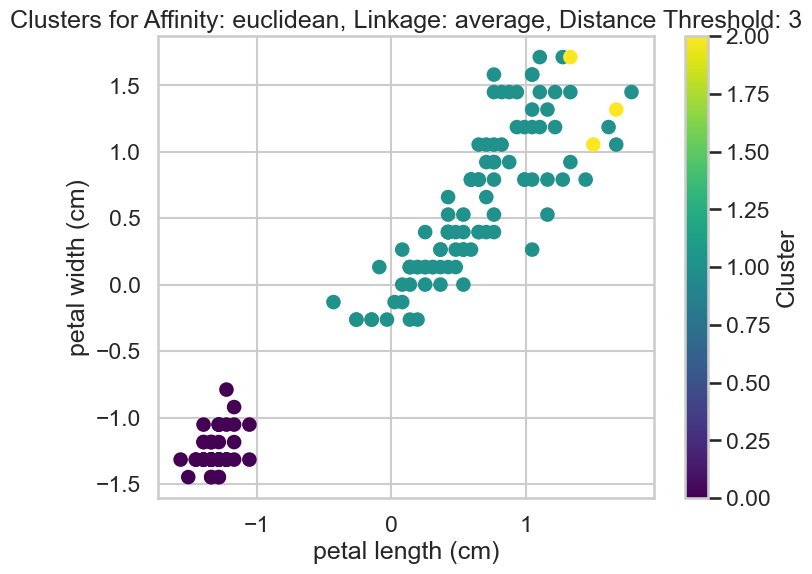

Best No.of clusters: 3
Best Parameters:
{'Affinity': 'euclidean', 'Linkage': 'average', 'Distance Threshold': 3}
Best silhouette score: 0.4802669329728697


In [36]:
plt.figure(figsize=(10, 6))
dendrogram(linkage(iris_df_normalized, method=best_parameters['Linkage'], metric=best_parameters['Affinity']))
plt.title(f'Dendrogram ({best_parameters["Affinity"].capitalize()} Affinity, {best_parameters["Linkage"].capitalize()} Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


agg_clustering = AgglomerativeClustering(n_clusters=None, affinity=best_parameters['Affinity'], linkage=best_parameters['Linkage'], distance_threshold=best_parameters['Distance Threshold'])
# Fit the model to the data
agg_clustering.fit(iris_df_normalized)


# Plot clusters for each pair of features
for pair in feature_pairs:
    plt.figure(figsize=(8, 6))
    plt.title(f'Clustering with k={k}') 

    plt.scatter(iris_df_normalized[pair[0]],iris_df_normalized[pair[1]], c=agg_clustering.labels_, cmap='viridis')
    plt.title(f'Clusters for Affinity: {best_parameters["Affinity"]}, Linkage: {best_parameters["Linkage"]}, Distance Threshold: {best_parameters["Distance Threshold"]}')
    plt.xlabel(pair[0])  # Fixing the x-axis label here
    plt.ylabel(pair[1])
    plt.colorbar(label='Cluster')
    plt.show()
    
    
print(f"Best No.of clusters: {len(np.unique(agg_clustering.labels_))}")
print("Best Parameters:")
print(best_parameters)

print(f"Best silhouette score: {best_silhouette_score}")

## DBscan normalized iris 

In [37]:
best_silhouette_score = -1
best_parameters = {}

# Iterate over different parameter combinations
for EPS in EPS_range:
    for Min_samples in Min_samples_range:
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        # Fit the model to the data
        dbscan.fit(iris_df_normalized)
        no_of_unique_clusters = len(np.unique(dbscan.labels_))
            
        if no_of_unique_clusters > 1:
        
            # Compute silhouette score
            silhouette_avg = silhouette_score(iris_df_normalized, dbscan.labels_)

#            # Plot clusters for each pair of features
#             for pair in feature_pairs:
#                 plt.figure(figsize=(8, 6)) 
#                 plt.title(f'Clusters for EPS: {EPS}, Min_samples: {Min_samples}')
#                 plt.scatter(iris_df_normalized[pair[0]],iris_df_normalized[pair[1]], c=dbscan.labels_, cmap='viridis')
#                 plt.xlabel(pair[0])  # Fixing the x-axis label here
#                 plt.ylabel(pair[1])
#                 plt.colorbar(label='Cluster')
#                 plt.show()


            # Print silhouette score and parameters
            print(f"EPS: {EPS}, Min_samples: {Min_samples}")
            print(f"Number of clusters: {len(np.unique(dbscan.labels_))}")  # Exclude noise label
            print(f"Silhouette Score: {silhouette_avg}\n")

            # Check if the current silhouette score is the best so far
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_parameters = {'EPS': EPS, 'Min_samples': Min_samples}
        else:
            continue


EPS: 0.42222222222222217, Min_samples: 5
Number of clusters: 6
Silhouette Score: 0.061858419174402574

EPS: 0.42222222222222217, Min_samples: 6
Number of clusters: 4
Silhouette Score: 0.011198935873349202

EPS: 0.42222222222222217, Min_samples: 7
Number of clusters: 6
Silhouette Score: -0.10309857523659773

EPS: 0.42222222222222217, Min_samples: 8
Number of clusters: 3
Silhouette Score: 0.2967063489775823

EPS: 0.42222222222222217, Min_samples: 9
Number of clusters: 3
Silhouette Score: 0.28823574994029677

EPS: 0.42222222222222217, Min_samples: 10
Number of clusters: 3
Silhouette Score: 0.28823574994029677

EPS: 0.42222222222222217, Min_samples: 11
Number of clusters: 3
Silhouette Score: 0.2780838470700254

EPS: 0.42222222222222217, Min_samples: 12
Number of clusters: 3
Silhouette Score: 0.1995821073344806

EPS: 0.7444444444444444, Min_samples: 5
Number of clusters: 3
Silhouette Score: 0.523400848673573

EPS: 0.7444444444444444, Min_samples: 6
Number of clusters: 3
Silhouette Score: 0.

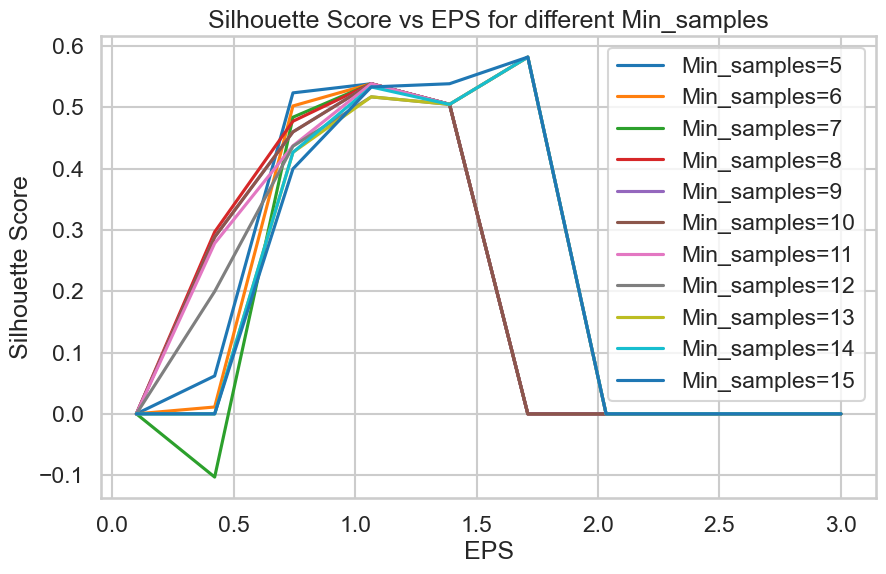

In [38]:
# Plot silhouette score versus variation in EPS and Min_samples
plt.figure(figsize=(10, 6))
for Min_samples in Min_samples_range:
    silhouette_scores = np.zeros_like(EPS_range)
    for i, EPS in enumerate(EPS_range):
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        dbscan.fit(iris_df_normalized)
        no_of_unique_clusters = len(np.unique(dbscan.labels_))
            
        if no_of_unique_clusters > 1:
            silhouette_scores[i] = silhouette_score(iris_df_normalized, dbscan.labels_)
    plt.plot(EPS_range, silhouette_scores, label=f'Min_samples={Min_samples}')
plt.xlabel('EPS')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs EPS for different Min_samples')
plt.legend()
plt.show()

## DBscan best parameters normalized iris 

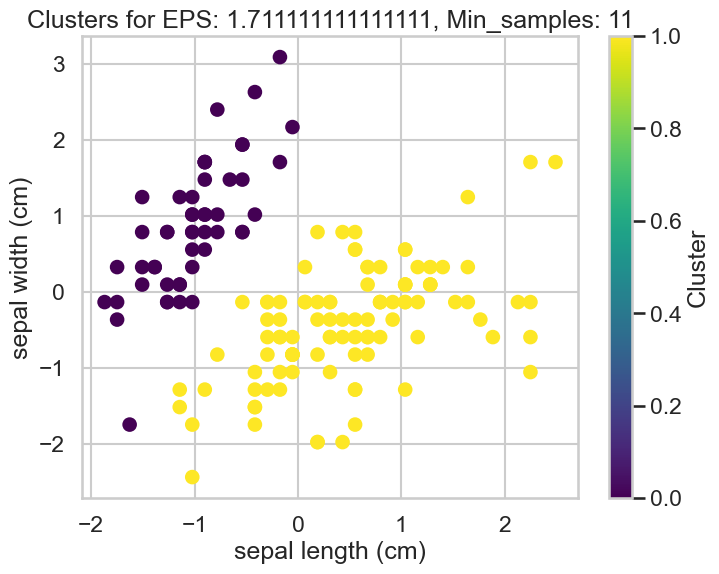

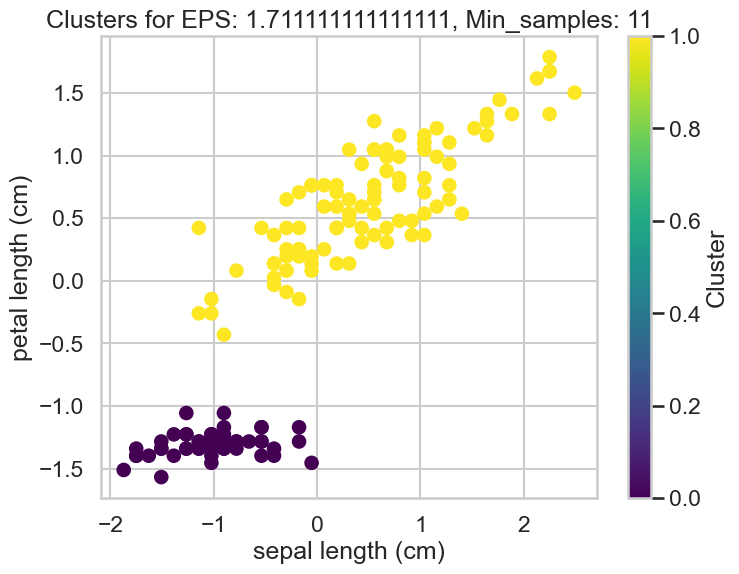

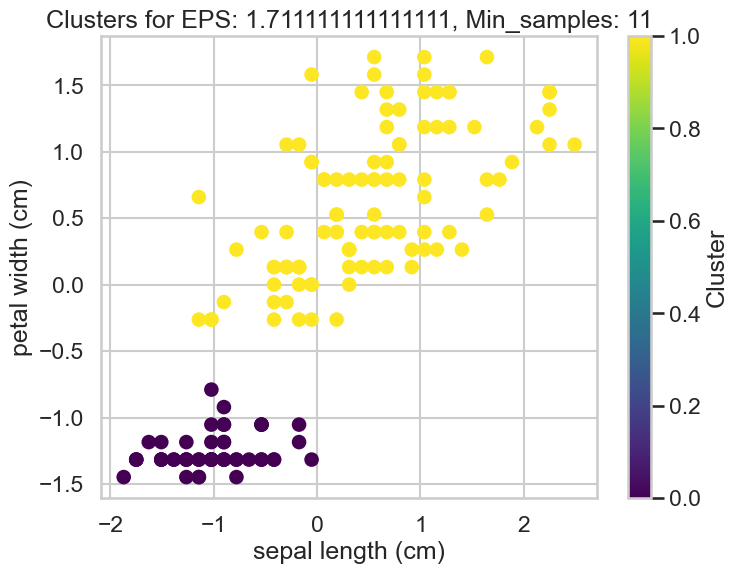

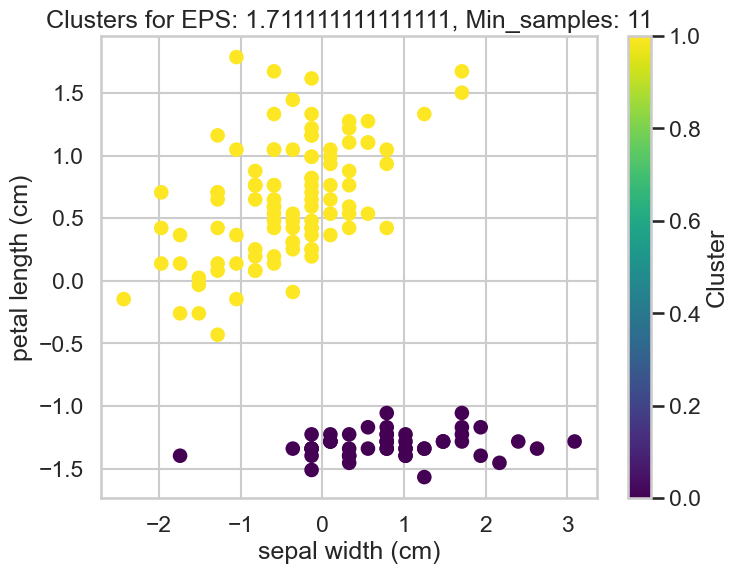

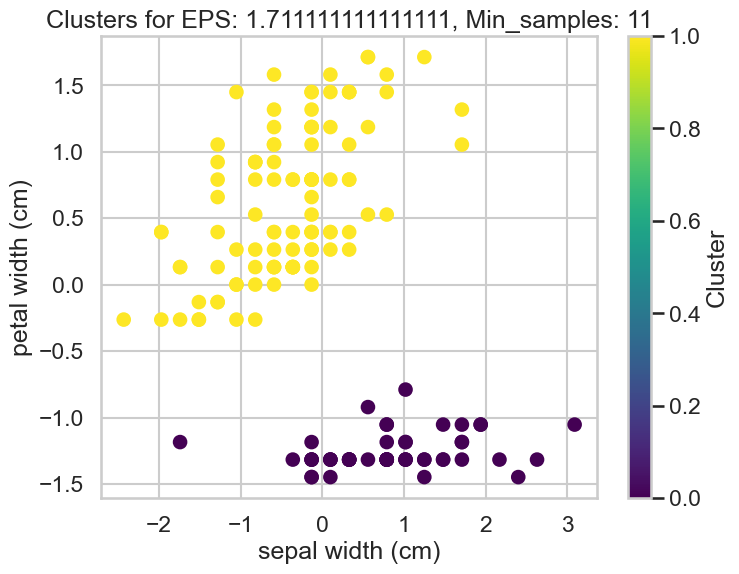

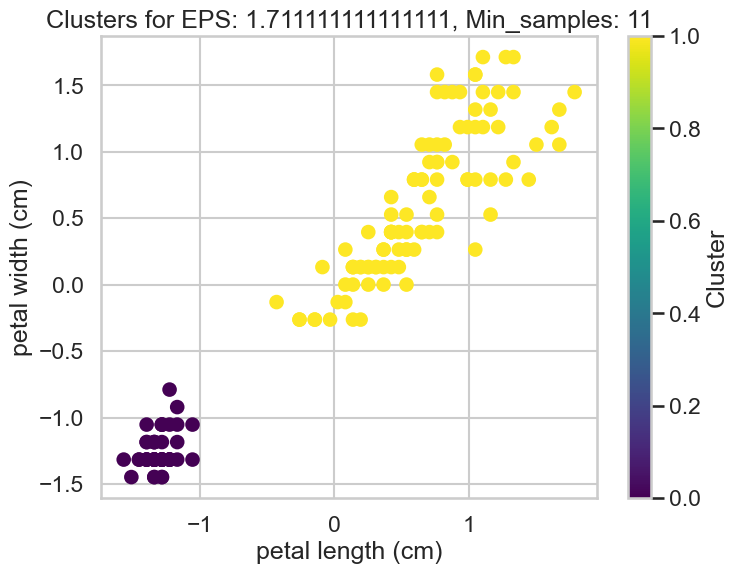

Best parameters:
{'EPS': 1.711111111111111, 'Min_samples': 11}
Best Silhouette Score: 0.5817500491982808
Best No.of Clusters: 2


In [39]:
# Create a DBSCAN instance with the best parameters
best_dbscan = DBSCAN(eps=best_parameters['EPS'], min_samples=best_parameters['Min_samples'])

# Fit the model to the data
best_dbscan.fit(iris_df_normalized)


# Plot clusters for each pair of features
for pair in feature_pairs:
    plt.figure(figsize=(8, 6)) 
    plt.title(f'Clusters for EPS: {best_parameters["EPS"]}, Min_samples: {best_parameters["Min_samples"]}')
    plt.scatter(iris_df_normalized[pair[0]],iris_df_normalized[pair[1]], c=best_dbscan.labels_, cmap='viridis')
    plt.xlabel(pair[0])  # Fixing the x-axis label here
    plt.ylabel(pair[1])
    plt.colorbar(label='Cluster')
    plt.show()
    
# Print the best parameters
print("Best parameters:")
print(best_parameters)
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best No.of Clusters: {len(np.unique(best_dbscan.labels_))}")

### Gaussian mixure iris normalized

In [40]:
k_values = range(2, 11)
GMM_silhouette_scores = []

best_silhouette_score = -1
best_k = None
best_covariance_type = None

for k in k_values:
    for covariance_type in covariance_types:
        # Create and fit the Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, covariance_type=covariance_type, random_state=42)
        gmm.fit(iris_df_normalized)

        # Calculate silhouette score
        labels = gmm.predict(iris_df_normalized)
        silhouette_avg = silhouette_score(iris_df_normalized, labels)
        GMM_silhouette_scores.append(silhouette_avg)

        # Check if the current silhouette score is better than the previous best score
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_k = k
            best_covariance_type = covariance_type

# Print the best silhouette score, K, and covariance type
print("Best Silhouette Score:", best_silhouette_score)
print("Best K:", best_k)
print("Best Covariance Type:", best_covariance_type)


Best Silhouette Score: 0.5817500491982808
Best K: 2
Best Covariance Type: full


In [41]:
# Define pairs of features
feature_pairs = list(combinations(iris_df_normalized.columns, 2))
for covariance_type in covariance_types:
    # Create and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=2, covariance_type=covariance_type, random_state=42)
    gmm.fit(iris_df_normalized)
    
    for pair in feature_pairs:
        for pair in feature_pairs:
            # Create a meshgrid for plotting the contour plot
            x = np.linspace(iris_df_normalized[pair[0]].min(), iris_df_normalized[pair[0]].max(), 100)
            y = np.linspace(iris_df_normalized[pair[1]].min(), iris_df_normalized[pair[1]].max(), 100)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T

            # Get the probabilities for each point in the meshgrid
            Z = -gmm.score_samples(np.hstack([XX, np.zeros((len(XX), 2))]))
            Z = Z.reshape(X.shape)

#             # Plot the contour plot
#             plt.figure(figsize=(8, 6))
#             plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10), cmap='viridis')
#             plt.scatter(iris_df_normalized[pair[0]], iris_df_normalized[pair[1]], c=gmm.predict(iris_df_normalized), cmap='viridis', s=20, edgecolor='k')
#             plt.title(f'GMM Contour Plot with {covariance_type.capitalize()} Covariance Type')
#             plt.xlabel(pair[0])
#             plt.ylabel(pair[1])
#             plt.colorbar(label='Cluster')
#             plt.show()


## Choosing clustering technique for the Iris Dataset 

### Non-Normalized

**KMeans** 
- Best Silhouette Score: 0.6810461692117462
- K = 2

**Hierarical**
- Best Silhouette Score: 0.6867350732769776
- K = 2

**DBscan**
- Best Silhouette Score: 0.6867350732769776
- K = 2

**GMM**
- Best Silhouette Score: 0.6867350732769776
- K: 2


We can find that the KMeans clustering has the highest Silhouette Score therefor it is the best clustering technique with K = 6

### Normalized

**KMeans** 
- Best Silhouette Score: 0.5817500491982808
- K = 2

**Hierarical**
- Best Silhouette Score: 0.4802669329728697
- K = 3

**DBscan**
- Best Silhouette Score: 0.5817500491982808
- K = 2

**GMM**
- Best Silhouette Score: 0.5817500491982808
- K: 2

We can find that using the non-normalized data wether using Hierarical, DBscan or GMM with K = 2 will give a higher Silhouette Score


# Customer dataset
Repeat all the above on the customer data set 

In [42]:
df1 = pd.read_csv(r'Customer data.csv')

In [43]:
customer_df = df1.copy()

In [44]:
scaler = MinMaxScaler()
features_to_scale = ['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']
customer_df[features_to_scale] = scaler.fit_transform(customer_df[features_to_scale])

In [45]:
customer_df = customer_df.drop(columns=['ID'])

## K means customer data 

In [46]:
# Define pairs of features
feature_pairs = list(combinations(customer_df.columns, 2))

# Define range of k values
k_values = range(2, 11)
distortions = [] 

# Loop over each k value
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(customer_df)    
    distortion = km.inertia_
    distortions.append(distortion)
    
#     # Plot clusters for each pair of features
#     for pair in feature_pairs:
#         plt.figure(figsize=(8, 6))
#         plt.title(f'Clustering with k={k}') 
#         display_cluster(customer_df[list(pair)].values, km=km, num_clusters=k,feature1= pair[0] ,feature2=pair[1]) 
#         plt.show()

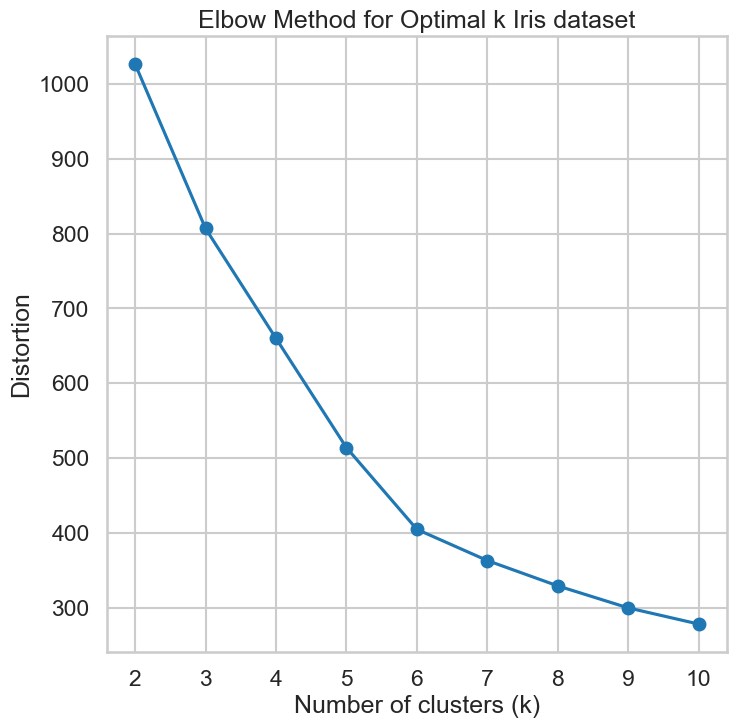

In [47]:
# Plot distortion values
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k Iris dataset')
plt.show()

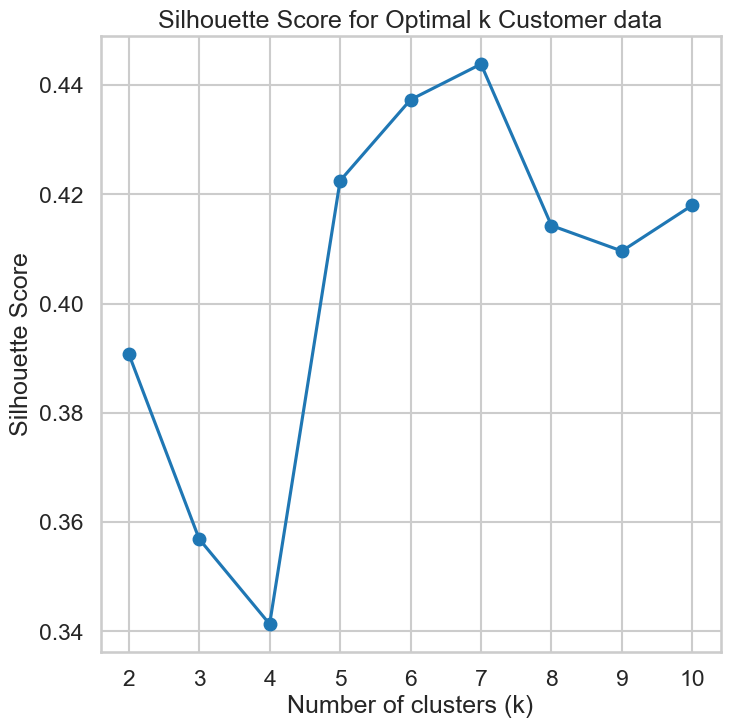

Best silhouette_score: 0.4438228840120346


In [48]:
k_values = range(2, 11)
K_Means_silhouette_scores = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(customer_df)
    labels = km.labels_
    K_Means_silhouette_scores.append(silhouette_score(customer_df, labels))

# Plot silhouette scores for different k values
plt.plot(k_values, K_Means_silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k Customer data')
plt.show()

print(f"Best silhouette_score: {max(K_Means_silhouette_scores)}")

we can find that K = 7 gets the best silhouette score

## Hierarical clustering customer data

In [49]:
# Define the range of parameters
affinities = ['euclidean', 'cosine']
linkages = ['average', 'single']
distance_thresholds = np.linspace(0.8,3,30)

best_silhouette_score = -1
best_parameters = {}

# Iterate over different parameter combinations
for affinity in affinities:
    for linkage_method in linkages:
        for distance_threshold in distance_thresholds:
            agg_clustering = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_method, distance_threshold=distance_threshold)
            # Fit the model to the data
            agg_clustering.fit(customer_df)
            
            no_of_unique_clusters = len(np.unique(agg_clustering.labels_))
            
            print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
            print(no_of_unique_clusters)
            
            print("------------------------")
            
            if no_of_unique_clusters > 1:
                # Compute silhouette score
                silhouette_avg = silhouette_score(customer_df, agg_clustering.labels_)
                # Check if the current silhouette score is the best so far
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_parameters = {'Affinity': affinity, 'Linkage': linkage_method, 'Distance Threshold': distance_threshold}

                # Display the resulting clusters
                print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
                print(f"Number of clusters: {agg_clustering.n_clusters_}")
                print(f"Silhouette Score: {silhouette_avg}\n")
                
                
#                                 # Plot dendrogram
#                 plt.figure(figsize=(10, 6))
#                 dendrogram(linkage(customer_df, method=linkage_method, metric=affinity))
#                 plt.title(f'Dendrogram ({affinity.capitalize()} Affinity, {linkage_method.capitalize()} Linkage)')
#                 plt.xlabel('Samples')  # Fixing the x-axis label here
#                 plt.ylabel('Distance')
#                 plt.show()
                
                
#                 # Plot clusters for each pair of features
#                 for pair in feature_pairs:
#                     plt.figure(figsize=(8, 6))
#                     plt.title(f'Clustering with k={k}') 
                    
#                     plt.scatter(customer_df[pair[0]],customer_df[pair[1]], c=agg_clustering.labels_, cmap='viridis')
#                     plt.title(f'Clusters for Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}')
#                     plt.xlabel(pair[0])  # Fixing the x-axis label here
#                     plt.ylabel(pair[1])
#                     plt.colorbar(label='Cluster')
#                     plt.show()

#               # Visualize clusters
                
               
                
            else:
                continue
                

Affinity: euclidean, Linkage: average, Distance Threshold: 0.8
15
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 0.8
Number of clusters: 15
Silhouette Score: 0.3717516254499508

Affinity: euclidean, Linkage: average, Distance Threshold: 0.8758620689655173
11
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 0.8758620689655173
Number of clusters: 11
Silhouette Score: 0.37711431527690054

Affinity: euclidean, Linkage: average, Distance Threshold: 0.9517241379310346
8
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 0.9517241379310346
Number of clusters: 8
Silhouette Score: 0.4030501405409442

Affinity: euclidean, Linkage: average, Distance Threshold: 1.0275862068965518
7
------------------------
Affinity: euclidean, Linkage: average, Distance Threshold: 1.0275862068965518
Number of clusters: 7
Silhouette Score: 0.40985394699786126

Affinity: euclidean, Linkage: average, Distance Thre

In [50]:
agg_clustering = AgglomerativeClustering(n_clusters=None, affinity=best_parameters['Affinity'], linkage=best_parameters['Linkage'], distance_threshold=best_parameters['Distance Threshold'])
# Fit the model to the data
agg_clustering.fit(customer_df)


print("Best Parameters:")
print(best_parameters)

print(f"Best silhouette: {best_silhouette_score}")

print(f"Number of clusters: {agg_clustering.n_clusters_}")

# plt.figure(figsize=(10, 6))
# dendrogram(linkage(customer_df, method=best_parameters['Linkage'], metric=best_parameters['Affinity']))
# plt.title(f'Dendrogram ({best_parameters["Affinity"].capitalize()} Affinity, {best_parameters["Linkage"].capitalize()} Linkage)')
# plt.xlabel('Samples')
# plt.ylabel('Distance')
# plt.show()


# # Plot clusters for each pair of features
# for pair in feature_pairs:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(customer_df[pair[0]],customer_df[pair[1]], c=agg_clustering.labels_, cmap='viridis')
#     plt.title(f'Clusters for Affinity: {best_parameters["Affinity"]}, Linkage: {best_parameters["Linkage"]}, Distance Threshold: {best_parameters["Distance Threshold"]}')
#     plt.xlabel(pair[0])  # Fixing the x-axis label here
#     plt.ylabel(pair[1])
#     plt.colorbar(label='Cluster')
#     plt.show()


Best Parameters:
{'Affinity': 'euclidean', 'Linkage': 'average', 'Distance Threshold': 1.0275862068965518}
Best silhouette: 0.40985394699786126
Number of clusters: 7


## DBscan 

In [51]:
best_silhouette_score = -1
best_parameters = {}

# Define the range of parameters
EPS_range = np.linspace(0.8, 3, 10)
Min_samples_range = range(5, 26)

# Iterate over different parameter combinations
for EPS in EPS_range:
    for Min_samples in Min_samples_range:
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        # Fit the model to the data
        dbscan.fit(customer_df)
        no_of_unique_clusters = len(np.unique(dbscan.labels_))
            
        if no_of_unique_clusters > 1:
        
            # Compute silhouette score
            silhouette_avg = silhouette_score(customer_df, dbscan.labels_)

#            # Plot clusters for each pair of features
#             for pair in feature_pairs:
#                 plt.figure(figsize=(8, 6)) 
#                 plt.title(f'Clusters for EPS: {EPS}, Min_samples: {Min_samples}')
#                 plt.scatter(customer_df[pair[0]],customer_df[pair[1]], c=dbscan.labels_, cmap='viridis')
#                 plt.xlabel(pair[0])  # Fixing the x-axis label here
#                 plt.ylabel(pair[1])
#                 plt.colorbar(label='Cluster')
#                 plt.show()


            # Print silhouette score and parameters
            print(f"EPS: {EPS}, Min_samples: {Min_samples}")
            print(f"Number of clusters: {len(np.unique(dbscan.labels_))}")  # Exclude noise label
            print(f"Silhouette Score: {silhouette_avg}\n")

            # Check if the current silhouette score is the best so far
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_parameters = {'EPS': EPS, 'Min_samples': Min_samples}
        else:
            continue


EPS: 0.8, Min_samples: 5
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 6
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 7
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 8
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 9
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 10
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 11
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 12
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 13
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 14
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 15
Number of clusters: 4
Silhouette Score: 0.40358876358465273

EPS: 0.8, Min_samples: 16
Number of clusters: 4


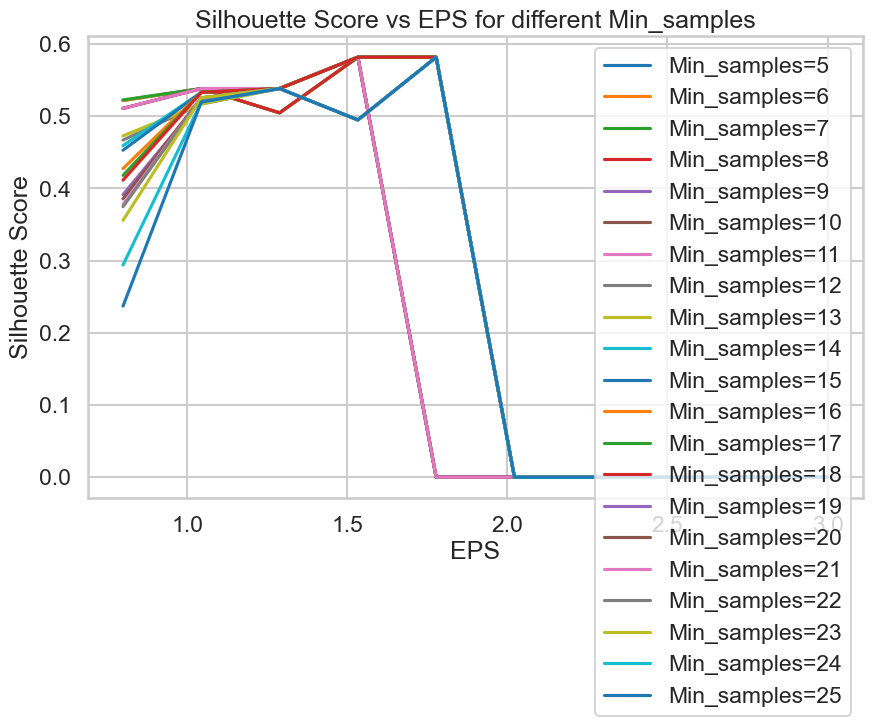

In [52]:
# Plot silhouette score versus variation in EPS and Min_samples
plt.figure(figsize=(10, 6))
for Min_samples in Min_samples_range:
    silhouette_scores = np.zeros_like(EPS_range)
    for i, EPS in enumerate(EPS_range):
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        dbscan.fit(iris_df_normalized)
        no_of_unique_clusters = len(np.unique(dbscan.labels_))
            
        if no_of_unique_clusters > 1:
            silhouette_scores[i] = silhouette_score(iris_df_normalized, dbscan.labels_)
    plt.plot(EPS_range, silhouette_scores, label=f'Min_samples={Min_samples}')
plt.xlabel('EPS')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs EPS for different Min_samples')
plt.legend()
plt.show()

## DBscan best parameters 

In [53]:
# Create a DBSCAN instance with the best parameters
best_dbscan = DBSCAN(eps=best_parameters['EPS'], min_samples=best_parameters['Min_samples'])

# Fit the model to the data
best_dbscan.fit(customer_df)


# # Plot clusters for each pair of features
# for pair in feature_pairs:
#     plt.figure(figsize=(8, 6)) 
#     plt.title(f'Clusters for EPS: {best_parameters["EPS"]}, Min_samples: {best_parameters["Min_samples"]}')
#     plt.scatter(customer_df[pair[0]],customer_df[pair[1]], c=best_dbscan.labels_, cmap='viridis')
#     plt.xlabel(pair[0])  # Fixing the x-axis label here
#     plt.ylabel(pair[1])
#     plt.colorbar(label='Cluster')
#     plt.show()
    
# Print the best parameters
print("Best parameters:")
print(best_parameters)
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best No.of Clusters: {len(np.unique(best_dbscan.labels_))}")

Best parameters:
{'EPS': 0.8, 'Min_samples': 5}
Best Silhouette Score: 0.40358876358465273
Best No.of Clusters: 4


### Gaussian mixture model

In [54]:
k_values = range(2, 11)
GMM_silhouette_scores = []

best_silhouette_score = -1
best_k = None
best_covariance_type = None

for k in k_values:
    for covariance_type in covariance_types:
        # Create and fit the Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, covariance_type=covariance_type, random_state=42)
        gmm.fit(customer_df)

        # Calculate silhouette score
        labels = gmm.predict(customer_df)
        silhouette_avg = silhouette_score(customer_df, labels)
        GMM_silhouette_scores.append(silhouette_avg)

        # Check if the current silhouette score is better than the previous best score
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_k = k
            best_covariance_type = covariance_type

# Print the best silhouette score, K, and covariance type
print("Best Silhouette Score:", best_silhouette_score)
print("Best K:", best_k)
print("Best Covariance Type:", best_covariance_type)


Best Silhouette Score: 0.43672131854816965
Best K: 6
Best Covariance Type: tied


In [55]:
from sklearn.metrics import silhouette_score

# Initialize variables to store the best silhouette score and covariance type
best_silhouette_score = -1
best_covariance_type = None

# Iterate over each covariance type
for covariance_type in covariance_types:
    silhouette_scores = []  # Store silhouette scores for each covariance type
    
    # Create and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=6, covariance_type=covariance_type, random_state=42)
    gmm.fit(customer_df)
    
    for pair in feature_pairs:
        # Create a meshgrid for plotting the contour plot
        x = np.linspace(customer_df[pair[0]].min(), customer_df[pair[0]].max(), 100)
        y = np.linspace(customer_df[pair[1]].min(), customer_df[pair[1]].max(), 100)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T

        # Get the probabilities for each point in the meshgrid
        Z = -gmm.score_samples(np.hstack([XX, np.zeros((len(XX), len(customer_df.columns) - 2))]))
        Z = Z.reshape(X.shape)

#         # Plot the contour plot
#         plt.figure(figsize=(8, 6))
#         plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10), cmap='viridis')
#         plt.scatter(customer_df[pair[0]], customer_df[pair[1]], c=gmm.predict(customer_df), cmap='viridis', s=20, edgecolor='k')
#         plt.title(f'GMM Contour Plot with {covariance_type.capitalize()} Covariance Type')
#         plt.xlabel(pair[0])
#         plt.ylabel(pair[1])
#         plt.colorbar(label='Cluster')
#         plt.show()

    # Calculate the silhouette score for the current covariance type
    cluster_labels = gmm.predict(customer_df)
    silhouette_avg = silhouette_score(customer_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Check if the current silhouette score is better than the previous best score
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_covariance_type = covariance_type

# Print the best covariance type and its corresponding silhouette score
print("Best Covariance Type:", best_covariance_type)
print("Best Silhouette Score:", best_silhouette_score)


Best Covariance Type: tied
Best Silhouette Score: 0.43672131854816965


## Choosing clustering technique for Customer data 

**KMeans** 
- Best Silhouette Score: 0.4438228840120346
- K = 7

**Hierarical**
- Best Silhouette Score: 0.40985394699786126
- K = 7

**DBscan**
- Best Silhouette Score: 0.40358876358465273
- K = 4

**GMM**
- Best Silhouette Score: 0.43672131854816965
- K: 6


We can find that the KMeans clustering has the highest Silhouette Score therefor it is the best clustering technique with K = 7